# Проєкт "Аналіз результатів складання НМТ в Україні за 2024 та 2025 роки"

## Мета проєкту
Провести порівняльний аналіз результатів Національного мультипредметного тесту (НМТ) за 2024 і 2025 роки з метою виявлення освітніх тенденцій, регіональних відмінностей та змін у виборі предметів, що дозволить сформувати обґрунтовані висновки для освітньої політики, шкільного планування та громадського обговорення.

## Опис датасетів
**Odata2024File** та **Odata2025File** містять інформацію про 310,000+ деперсоніфікованих даних всіх учасників тестування з такими параметрами:
- **OutID**: ID
- **Birth**: Рік народження
- **SexTypeName**: Стать
- **Regname**: Регіон реєстрації/проживання учасника
- **AreaName**: Район/Місто реєстрації/проживання учасника
- **TerName**: Населений пункт реєстрації/проживання учасника
- **RegTypeName**: Статус учасника
- **TerTypeName**: Тип території
- **EOName**: Заклад освіти учасника
- **EOTypeName**: Тип закладу освіти 
- **EORegName**: Регіон, де розташований заклад освіти 
- **EOAreaName**: Район/Місто, де розташований заклад освіти 
- **EOTerName**: Населений пункт, де розташований заклад освіти 
- **EOParent**: Орган, якому підпорядковується заклад освіти 
- **EOEdrpou**: Код ЄДРПОУ закладу освіти (згідно з Єдиним державним реєстром підприємств та організацій України)
- **Eoedeboid**: Код закладу освіти в ЄДЕБО (Єдина державна електронна база з питань освіти)
- **Test**: Назва тесту
- **TestDate**: Дата проведення тесту
- **Block**: Назва блоків тесту
- **BlockLang**: Мова складання ,блоку
- **BlockStatus**: Результат складання блоку
- **BlockBall100**: Оцінка за шкалою 100-200 з відповідного блоку
- **BlockBall**: Тестовий бал з відповідного блоку
- **PTRegName**: Регіон, де розташований тимчасовий екзаменаційний центр
- **PTAreaName**: Район\Місто, де розташований тимчасовий екзаменаційний центр
- **PTTerName**: Населений пункт, де розташований тимчасовий екзаменаційний центр
- **Ukr**: Українська мова
- **Hist**: Історія України
- **Math**: Математика
- **Phys**: Фізика
- **Chem**: Хімія
- **Bio**: Біологія
- **Geo**: Географія
- **Eng**: Англійська мова
- **Fra**: Французька мова
- **Deu**: Німецька мова
- **Spa**: Іспанська мова
- **UkrLit**: Українська література

---

## 1. Завантаження та перший огляд даних


In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_ind

import warnings

pd.set_option('display.max_columns', None)

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

#### Кольорова палітра по рокам.

In [3]:
palette = {
    2024: '#1f77b4',
    2025: '#ff7f0e',
}

#### Дані за 2024 рік

In [4]:
df_2024 = pd.read_csv('Odata2024File.csv', delimiter=';', low_memory=False)

#### Дані за 2025 рік

In [5]:
df_2025 = pd.read_csv('Odata2025File.csv', delimiter=';', low_memory=False)

In [6]:
print(f"Розмір датасету за 2024 рік: {df_2024.shape}")
print(f"Розмір датасету за 2025 рік: {df_2025.shape}")

Розмір датасету за 2024 рік: (312508, 73)
Розмір датасету за 2025 рік: (317091, 75)


<p style='color:steelblue; font-weight: 700;'> В 2024 році в тестуванні прийняло участь 312508 учасників, а в 2025 році - 317091. 

In [7]:
print("\nПерші 2 рядки датасету за 2024 рік:")
display(df_2024.head(2))
print("\nПерші 2 рядки датасету за 2025 рік:")
display(df_2025.head(2))


Перші 2 рядки датасету за 2024 рік:


,outid,Birth,SexTypeName,RegName,AreaName,TerName,RegTypeName,TerTypeName,EOName,EOTypeName,EORegName,EOAreaName,EOTerName,EOParent,Test,TestDate,UkrBlock,UkrBlockStatus,UkrBlockBall100,UkrBlockBall,HistBlock,HistBlockLang,HistBlockStatus,HistBlockBall100,HistBlockBall,MathBlock,MathBlockLang,MathBlockStatus,MathBlockBall100,MathBlockBall,PhysBlock,PhysBlockLang,PhysBlockStatus,PhysBlockBall100,PhysBlockBall,ChemBlock,ChemBlockLang,ChemBlockStatus,ChemBlockBall100,ChemBlockBall,BioBlock,BioBlockLang,BioBlockStatus,BioBlockBall100,BioBlockBall,GeoBlock,GeoBlockLang,GeoBlockStatus,GeoBlockBall100,GeoBlockBall,EngBlock,EngBlockStatus,EngBlockBall100,EngBlockBall,FraBlock,FraBlockStatus,FraBlockBall100,FraBlockBall,DeuBlock,DeuBlockStatus,DeuBlockBall100,DeuBlockBall,SpaBlock,SpaBlockStatus,SpaBlockBall100,SpaBlockBall,UkrLitBlock,UkrLitBlockStatus,UkrLitBlockBall100,UkrLitBlockBall,PTRegName,PTAreaName,PTTerName
0,9b995d13-de3d-47c2-9b4e-004025346a49,2006,жіноча,Черкаська область,Черкаський район,с.Ліпляве,Випускник загальноосвітнього навчального закла...,"селище, село","Комунальний заклад ""Ліплявський ліцей"" Ліплявс...",ліцей,Черкаська область,Черкаський район,с.Ліпляве,Ліплявська сільська рада Канівського району Че...,НМТ,20.06.2024,Українська мова,Зараховано,"146,0",22.0,Історія України,українська,Зараховано,"144,0",24.0,Математика,українська,Зараховано,"115,0",7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Біологія,українська,Зараховано,"149,0",24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Черкаська область,м.Канів,м.Канів
1,9c0a5f77-73e4-475d-aff9-006da514737b,2007,чоловіча,Дніпропетровська область,Нікопольський район,м.Нікополь,Випускник загальноосвітнього навчального закла...,місто,"Відокремлений структурний підрозділ ""Нікопольс...",заклад фахової передвищої освіти,Дніпропетровська область,Нікопольський район,м.Нікополь,Міністерство освіти і науки України,НМТ,16.07.2024,Українська мова,Зараховано,"120,0",11.0,Історія України,українська,Зараховано,"141,0",21.0,Математика,українська,Зараховано,"134,0",10.0,Фізика,українська,Зараховано,"140,0",12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Дніпропетровська область,м.Покров,м.Покров



Перші 2 рядки датасету за 2025 рік:


,outid,Birth,SexTypeName,RegName,AreaName,TerName,RegTypeName,TerTypeName,EOName,EOTypeName,EORegName,EOAreaName,EOTerName,EOParent,EOEdrpou,EOedeboid,Test,TestDate,UkrBlock,UkrBlockStatus,UkrBlockBall100,UkrBlockBall,HistBlock,HistBlockLang,HistBlockStatus,HistBlockBall100,HistBlockBall,MathBlock,MathBlockLang,MathBlockStatus,MathBlockBall100,MathBlockBall,PhysBlock,PhysBlockLang,PhysBlockStatus,PhysBlockBall100,PhysBlockBall,ChemBlock,ChemBlockLang,ChemBlockStatus,ChemBlockBall100,ChemBlockBall,BioBlock,BioBlockLang,BioBlockStatus,BioBlockBall100,BioBlockBall,GeoBlock,GeoBlockLang,GeoBlockStatus,GeoBlockBall100,GeoBlockBall,EngBlock,EngBlockStatus,EngBlockBall100,EngBlockBall,FraBlock,FraBlockStatus,FraBlockBall100,FraBlockBall,DeuBlock,DeuBlockStatus,DeuBlockBall100,DeuBlockBall,SpaBlock,SpaBlockStatus,SpaBlockBall100,SpaBlockBall,UkrLitBlock,UkrLitBlockStatus,UkrLitBlockBall100,UkrLitBlockBall,PTRegName,PTAreaName,PTTerName
0,9e78ac3d-e137-41a2-83df-000bc5e7abd8,2007,чоловіча,Київська область,Броварський район,м.Бровари,Випускник минулих років,місто,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,НМТ,17.05.2025,Українська мова,Зараховано,"136,0",15.0,Історія України,українська,Зараховано,"124,0",13.0,Математика,українська,Зараховано,"100,0",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Географія,українська,Зараховано,"145,0",20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Київська область,м.Бровари,м.Бровари
1,9e77fd9e-00f4-4399-b239-000d421551cc,2008,жіноча,Чернівецька область,Вижницький район,с.Нижні Станівці,Випускник поточного року,"селище, село",Нижньостанівецький заклад загальної середньої ...,середня загальноосвітня школа,Чернівецька область,Вижницький район,с.Нижні Станівці,Брусницька сільська рада Вижницького району Че...,21443181.0,140437.0,НМТ,19.06.2025,Українська мова,Зараховано,"138,0",16.0,Історія України,українська,Зараховано,"124,0",13.0,Математика,українська,Зараховано,"100,0",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Географія,українська,Зараховано,"140,0",17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Чернівецька область,Вижницький район,м.Вижниця


#### Загальна інформація про дані за 2024 рік

In [8]:
display(df_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312508 entries, 0 to 312507
Data columns (total 73 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   outid               312508 non-null  object 
 1   Birth               312508 non-null  int64  
 2   SexTypeName         312508 non-null  object 
 3   RegName             312508 non-null  object 
 4   AreaName            312508 non-null  object 
 5   TerName             312508 non-null  object 
 6   RegTypeName         312508 non-null  object 
 7   TerTypeName         312508 non-null  object 
 8   EOName              234200 non-null  object 
 9   EOTypeName          234200 non-null  object 
 10  EORegName           234200 non-null  object 
 11  EOAreaName          234200 non-null  object 
 12  EOTerName           234200 non-null  object 
 13  EOParent            234139 non-null  object 
 14  Test                312508 non-null  object 
 15  TestDate            312508 non-nul

None

#### Загальна інформація про дані за 2025 рік

In [9]:
display(df_2025.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317091 entries, 0 to 317090
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   outid               317091 non-null  object 
 1   Birth               317091 non-null  int64  
 2   SexTypeName         317091 non-null  object 
 3   RegName             317091 non-null  object 
 4   AreaName            317091 non-null  object 
 5   TerName             317091 non-null  object 
 6   RegTypeName         317091 non-null  object 
 7   TerTypeName         317091 non-null  object 
 8   EOName              236423 non-null  object 
 9   EOTypeName          236423 non-null  object 
 10  EORegName           236423 non-null  object 
 11  EOAreaName          236423 non-null  object 
 12  EOTerName           236423 non-null  object 
 13  EOParent            236180 non-null  object 
 14  EOEdrpou            236347 non-null  float64
 15  EOedeboid           235967 non-nul

None

<p style='color:steelblue; font-weight: 700;'> Маємо пропущені дані в кожному датафреймі. За правилами здачі НМТ в 2024 та 2025 роках кожен учасник мав здати тест з трьох обов'язкових предметів: українська мова, математика та історія України, а четвертий предмет - на вибір. Саме тому в кожному рядку містяться пропущені дані в колонках з предметів на вибір. На наступному етапі буде проведено повний аналіз пропущених даних.

#### Перевірка наявності дублікатів в кожному датафреймі.

In [10]:
df_2024.duplicated().value_counts()

False    312508
Name: count, dtype: int64

In [11]:
df_2025.duplicated().value_counts()

False    317091
Name: count, dtype: int64

#### Видалимо дві зайві колонки (з кодом закладу освіти) з df_2025.  

In [12]:
df_2025 = df_2025.drop(columns=["EOEdrpou", "EOedeboid"])

#### Об'єднаємо датафрейми в один, попередньо додавши в кожен датафрейм новий стовпець з роком тестування.

In [13]:
df_2024["year"] = 2024
df_2025["year"] = 2025

df_2024_2025 = pd.concat([df_2024, df_2025], ignore_index=True)

In [14]:
df_2024_2025.shape

(629599, 74)

<p style='color:steelblue; font-weight: 700;'> Після об'єднання маємо датафрейм, розміром 629599 рядків і 74 колонки. На наступному етапі проведемо дослідження даних і отримаємо кінцевий варіант датафрейму для подальшого аналізу.


---

## 2. Дослідницький аналіз даних (EDA)

### 2.1. Видалення непотрібних для аналізу стовпців.

In [15]:
# Список колонок, які видаляємо
removed_cols = ['AreaName', 'TerName', 'EOName', 'EOTypeName',
                'EORegName', 'EOAreaName', 'EOTerName',
                'EOParent', 'Test', 'PTAreaName', 'PTTerName']

df_all = df_2024_2025.drop(columns=removed_cols)

### 2.2. Додавання нових колонок.

#### Колонка outid - це ідентифікатор в форматі UUID (універсальний унікальний ідентифікатор), який уже не містить персональних даних. Створюємо нову колонку id_num з унікальним числовим значеням для прискорення подальшого можливого групування та агрегації даних.

In [16]:
df_all['id_num'] = df_all['outid'].factorize()[0]

#### Додамо стовпець з віком учасника тестування.

In [17]:
df_all['Age'] = df_all['year'] - df_all['Birth']
# df_all['Age'] = df_all['TestDate'].dt.year - df_all['Birth']

In [18]:
df_all[:2]

,outid,Birth,SexTypeName,RegName,RegTypeName,TerTypeName,TestDate,UkrBlock,UkrBlockStatus,UkrBlockBall100,UkrBlockBall,HistBlock,HistBlockLang,HistBlockStatus,HistBlockBall100,HistBlockBall,MathBlock,MathBlockLang,MathBlockStatus,MathBlockBall100,MathBlockBall,PhysBlock,PhysBlockLang,PhysBlockStatus,PhysBlockBall100,PhysBlockBall,ChemBlock,ChemBlockLang,ChemBlockStatus,ChemBlockBall100,ChemBlockBall,BioBlock,BioBlockLang,BioBlockStatus,BioBlockBall100,BioBlockBall,GeoBlock,GeoBlockLang,GeoBlockStatus,GeoBlockBall100,GeoBlockBall,EngBlock,EngBlockStatus,EngBlockBall100,EngBlockBall,FraBlock,FraBlockStatus,FraBlockBall100,FraBlockBall,DeuBlock,DeuBlockStatus,DeuBlockBall100,DeuBlockBall,SpaBlock,SpaBlockStatus,SpaBlockBall100,SpaBlockBall,UkrLitBlock,UkrLitBlockStatus,UkrLitBlockBall100,UkrLitBlockBall,PTRegName,year,id_num,Age
0,9b995d13-de3d-47c2-9b4e-004025346a49,2006,жіноча,Черкаська область,Випускник загальноосвітнього навчального закла...,"селище, село",20.06.2024,Українська мова,Зараховано,"146,0",22.0,Історія України,українська,Зараховано,"144,0",24.0,Математика,українська,Зараховано,"115,0",7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Біологія,українська,Зараховано,"149,0",24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Черкаська область,2024,0,18
1,9c0a5f77-73e4-475d-aff9-006da514737b,2007,чоловіча,Дніпропетровська область,Випускник загальноосвітнього навчального закла...,місто,16.07.2024,Українська мова,Зараховано,"120,0",11.0,Історія України,українська,Зараховано,"141,0",21.0,Математика,українська,Зараховано,"134,0",10.0,Фізика,українська,Зараховано,"140,0",12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Дніпропетровська область,2024,1,17


#### Додамо стовпець з назвою обраного четвертого предмета.

In [19]:
# Список назв предметів (обов'язкові та на вибір)
subjects_list = [col for col in df_all.columns 
                if col.endswith("Block")]
print(subjects_list)

['UkrBlock', 'HistBlock', 'MathBlock', 'PhysBlock', 'ChemBlock', 'BioBlock', 'GeoBlock', 'EngBlock', 'FraBlock', 'DeuBlock', 'SpaBlock', 'UkrLitBlock']


In [20]:
# Список обов'язкових предметів
required_subjects_list = ['UkrBlock', 'HistBlock', 'MathBlock']

# Список предметів на вибір
optional_subjects_list = [item for item in subjects_list 
                          if item not in required_subjects_list]
print(optional_subjects_list)

['PhysBlock', 'ChemBlock', 'BioBlock', 'GeoBlock', 'EngBlock', 'FraBlock', 'DeuBlock', 'SpaBlock', 'UkrLitBlock']


In [21]:
df_all["FourthSubBlock"] = df_all[optional_subjects_list].apply(
    lambda row: row.first_valid_index(), axis=1
)

In [22]:
subject_names = {
    'PhysBlock': 'Фізика',
    'ChemBlock': 'Хімія',
    'BioBlock': 'Біологія',
    'GeoBlock': 'Географія',
    'EngBlock': 'Англійська мова',
    'FraBlock': 'Французька мова',
    'DeuBlock': 'Німецька мова',
    'SpaBlock': 'Іспанська мова',
    'UkrLitBlock': 'Українська література'
}

df_all["FourthSubName"] = df_all["FourthSubBlock"].map(subject_names)

#### Також додаємо стовпець зі статусом четверного предмета.

In [23]:
df_all["FourthSubBlockStatus"] = df_all.apply(
    lambda row: row[row["FourthSubBlock"] + "Status"] if pd.notna(row["FourthSubBlock"]) else np.nan,
    axis=1
)

#### І додаємо стовпець з результатом четверного предмета.

In [24]:
df_all["FourthSubBlockBall100"] = df_all.apply(
    lambda row: row[row["FourthSubBlock"] + "Ball100"] if pd.notna(row["FourthSubBlock"]) else np.nan,
    axis=1
)

#### Додамо стовпець з загальним результатом здачі НМТ: якщо з усіх чотирьох предметів результат "Зараховано" - результат "Склав", в іншому випадку - "Не склав".

In [26]:
# Список колонок зі статусами по 4 предметах
status_cols = ["UkrBlockStatus", "MathBlockStatus", "HistBlockStatus", "FourthSubBlockStatus"]

# Умова: всі 4 статуси == "Зараховано"
df_all["OverallResult"] = df_all[status_cols].apply(
    lambda row: "Склав" if (row == "Зараховано").all() else "Не склав",
    axis=1
)

#### Додаємо стовпець RegionGroup із назвами країн проходження НМТ.

In [27]:
df_all['RegionGroup'] = df_all['PTRegName'].apply(
    lambda x: 'Україна' if str(x).endswith('область') or x == 'м.Київ' else x
)

### 2.3. Зміна типів даних.

#### Всі колонки, що закінчуються на BlockBall100 мають мати числове значення.

In [28]:
# Список всіх колонок, що закінчуються на BlockBall100
blockball100_cols = [col for col in df_all.columns if col.endswith("BlockBall100")]

# Замінюємо кому на крапку
for col in blockball100_cols:
    df_all[col] = df_all[col].str.replace(",", ".", regex=False)

# Перетворюємо на числовий тип
df_all[blockball100_cols] = df_all[blockball100_cols].apply(pd.to_numeric, errors="coerce")

#### Перетворення типу колонки дати проведення тестування.

In [29]:
df_all["TestDate"] = pd.to_datetime(df_all["TestDate"], format="%d.%m.%Y", errors="coerce")

#### Уніфікуємо значення статусу в колонках типу _BlockStatus, замінивши "Не з’явився(лася)" на "Не з’явився".

In [30]:
# Список всіх колонок, що закінчуються на BlockStatus
blockstatus_cols = [col for col in df_all.columns if col.endswith("BlockStatus")]

# Замінюємо "Не з’явився(лася)" на "Не з’явився"
for col in blockstatus_cols:
    df_all[col] = df_all[col].replace("Не з’явився(лася)", "Не з’явився")

#### Уніфікуємо значення статусу в колонці RegTypeName, замінивши "Випускник загальноосвітнього навчального закладу 2024 року" на "Випускник поточного року".

In [31]:
df_all['RegTypeName'] = df_all['RegTypeName'].replace("Випускник загальноосвітнього навчального закладу 2024 року", "Випускник поточного року")

In [34]:
df_all[:2]

,outid,Birth,SexTypeName,RegName,RegTypeName,TerTypeName,TestDate,UkrBlock,UkrBlockStatus,UkrBlockBall100,UkrBlockBall,HistBlock,HistBlockLang,HistBlockStatus,HistBlockBall100,HistBlockBall,MathBlock,MathBlockLang,MathBlockStatus,MathBlockBall100,MathBlockBall,PhysBlock,PhysBlockLang,PhysBlockStatus,PhysBlockBall100,PhysBlockBall,ChemBlock,ChemBlockLang,ChemBlockStatus,ChemBlockBall100,ChemBlockBall,BioBlock,BioBlockLang,BioBlockStatus,BioBlockBall100,BioBlockBall,GeoBlock,GeoBlockLang,GeoBlockStatus,GeoBlockBall100,GeoBlockBall,EngBlock,EngBlockStatus,EngBlockBall100,EngBlockBall,FraBlock,FraBlockStatus,FraBlockBall100,FraBlockBall,DeuBlock,DeuBlockStatus,DeuBlockBall100,DeuBlockBall,SpaBlock,SpaBlockStatus,SpaBlockBall100,SpaBlockBall,UkrLitBlock,UkrLitBlockStatus,UkrLitBlockBall100,UkrLitBlockBall,PTRegName,year,id_num,Age,FourthSubBlock,FourthSubName,FourthSubBlockStatus,FourthSubBlockBall100,OverallResult,RegionGroup
0,9b995d13-de3d-47c2-9b4e-004025346a49,2006,жіноча,Черкаська область,Випускник поточного року,"селище, село",2024-06-20,Українська мова,Зараховано,146.0,22.0,Історія України,українська,Зараховано,144.0,24.0,Математика,українська,Зараховано,115.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Біологія,українська,Зараховано,149.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Черкаська область,2024,0,18,BioBlock,Біологія,Зараховано,149.0,Склав,Україна
1,9c0a5f77-73e4-475d-aff9-006da514737b,2007,чоловіча,Дніпропетровська область,Випускник поточного року,місто,2024-07-16,Українська мова,Зараховано,120.0,11.0,Історія України,українська,Зараховано,141.0,21.0,Математика,українська,Зараховано,134.0,10.0,Фізика,українська,Зараховано,140.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Дніпропетровська область,2024,1,17,PhysBlock,Фізика,Зараховано,140.0,Склав,Україна


#### Збережемо датафрейм для завантаження в BI систему для побудови дашборда.

In [33]:
df_all.to_csv("nmt_2024_2025.csv", index=False)

#### Переведення даних у категоріальний тип. З опису даних зрозуміло, що всі колонки, окрім ID, року народження та колонки з балами за тест є категогіальними.

In [32]:
categoric_col = ['SexTypeName', 'RegName', 'RegTypeName', 'TerTypeName', 
                 'UkrBlock', 'UkrBlockStatus', 'HistBlock', 'HistBlockLang', 
                 'HistBlockStatus', 'MathBlock', 'MathBlockLang', 
                 'MathBlockStatus', 'PhysBlock', 'PhysBlockLang', 
                 'PhysBlockStatus', 'ChemBlock', 'ChemBlockLang', 
                 'ChemBlockStatus', 'BioBlock', 'BioBlockLang', 
                 'BioBlockStatus', 'GeoBlock', 'GeoBlockLang', 
                 'GeoBlockStatus', 'EngBlock', 'EngBlockStatus', 
                 'FraBlock', 'FraBlockStatus', 'DeuBlock',
                 'DeuBlockStatus', 'SpaBlock', 'SpaBlockStatus', 
                 'UkrLitBlock', 'UkrLitBlockStatus', 'FourthSubBlock', 
                 'FourthSubName', 'FourthSubBlockStatus', 'OverallResult',
                 'PTRegName', 'year', 'RegionGroup']

In [33]:
for col in categoric_col:
    df_all[col] = pd.Categorical(df_all[col])

### 2.4. Аналіз пропущених значень.
#### Обчислимо відсоток пропущених значень в колонках з результатом тесту по кожному предмету.

In [34]:
(df_all[blockball100_cols].isna().mean() * 100).round(2)

UkrBlockBall100           8.98
HistBlockBall100          9.02
MathBlockBall100          8.98
PhysBlockBall100         97.49
ChemBlockBall100         99.07
BioBlockBall100          82.31
GeoBlockBall100          80.01
EngBlockBall100          64.82
FraBlockBall100          99.91
DeuBlockBall100          99.05
SpaBlockBall100          99.96
UkrLitBlockBall100       86.41
FourthSubBlockBall100     9.02
dtype: float64

<p style='color:steelblue; font-weight: 700;'> Високий відсоток пропущених значень (64 % - 99 %), означає, що це предмет на вибір. Тому значення присутнє тільки в тих, хто цей предмет обрав собі четвертим тестовим. Спочатку проаналізуємо чому серед обов'язкових трьох предметів (Ukr, Hist та Math) є пропуски в даних.

#### Виведемо кількість унікальних значень по кожній колонці.

In [35]:
for col in df_all.columns:
    unique_count = df_all[col].nunique(dropna=False)
    print(f"{col}: {unique_count} унікальних значень")

outid: 629599 унікальних значень
Birth: 57 унікальних значень
SexTypeName: 2 унікальних значень
RegName: 26 унікальних значень
RegTypeName: 3 унікальних значень
TerTypeName: 3 унікальних значень
TestDate: 40 унікальних значень
UkrBlock: 1 унікальних значень
UkrBlockStatus: 4 унікальних значень
UkrBlockBall100: 41 унікальних значень
UkrBlockBall: 47 унікальних значень
HistBlock: 1 унікальних значень
HistBlockLang: 4 унікальних значень
HistBlockStatus: 4 унікальних значень
HistBlockBall100: 49 унікальних значень
HistBlockBall: 55 унікальних значень
MathBlock: 1 унікальних значень
MathBlockLang: 4 унікальних значень
MathBlockStatus: 4 унікальних значень
MathBlockBall100: 30 унікальних значень
MathBlockBall: 34 унікальних значень
PhysBlock: 2 унікальних значень
PhysBlockLang: 5 унікальних значень
PhysBlockStatus: 4 унікальних значень
PhysBlockBall100: 30 унікальних значень
PhysBlockBall: 34 унікальних значень
ChemBlock: 2 унікальних значень
ChemBlockLang: 5 унікальних значень
ChemBlockStat

#### Виведемо кількість унікальних значень по кожному категоріальному стовпцю. 

In [36]:
unique_values = {
    col: df_all[col].dropna().unique().tolist() for col in categoric_col
}

unique_df = pd.DataFrame([
    {"column": col, "unique_values": values, "n_unique": len(values)}
    for col, values in unique_values.items()
])

unique_df = unique_df.sort_values("n_unique", ascending=False)

In [37]:
unique_df

,column,unique_values,n_unique
38,PTRegName,"[Черкаська область, Дніпропетровська область, ...",55
40,RegionGroup,"[Україна, Польща, Латвія, Німеччина, Чехія, Ли...",34
1,RegName,"[Черкаська область, Дніпропетровська область, ...",26
35,FourthSubName,"[Біологія, Фізика, Українська література, Англ...",9
34,FourthSubBlock,"[BioBlock, PhysBlock, UkrLitBlock, EngBlock, G...",9
16,ChemBlockLang,"[українська, угорська, румунська, польська]",4
36,FourthSubBlockStatus,"[Зараховано, Не з’явився, Не подолав поріг, Ан...",4
33,UkrLitBlockStatus,"[Зараховано, Не з’явився, Не подолав поріг, Ан...",4
29,DeuBlockStatus,"[Не з’явився, Зараховано, Не подолав поріг, Ан...",4
25,EngBlockStatus,"[Зараховано, Не з’явився, Не подолав поріг, Ан...",4


#### В результуючій таблиці по рокам порівняємо кількісно значення кожного статусу по трьом обов'язковим предметам.

In [38]:
required_subjects = pd.concat([
    df_all.groupby(["year", "UkrBlockStatus"], observed=True).size().unstack(fill_value=0).assign(subject="Ukr"),
    df_all.groupby(["year", "MathBlockStatus"], observed=True).size().unstack(fill_value=0).assign(subject="Math"),
    df_all.groupby(["year", "HistBlockStatus"], observed=True).size().unstack(fill_value=0).assign(subject="Hist")
]).reset_index().set_index(["year", "subject"])

required_subjects["Загалом"] = required_subjects.sum(axis=1)

In [39]:
# Задаємо бажаний порядок статусу тесту
ordered_status = ['Загалом', 'Зараховано', 'Не подолав поріг', 'Не з’явився', 'Анульовано']

required_subjects[ordered_status]

,,Загалом,Зараховано,Не подолав поріг,Не з’явився,Анульовано
year,subject,,,,,
2024,Ukr,312508,282152,1218,29096,42
2025,Ukr,317091,288514,1148,27395,34
2024,Math,312508,247156,36214,29096,42
2025,Math,317091,255232,34430,27395,34
2024,Hist,312508,282866,325,29275,42
2025,Hist,317091,289129,463,27465,34


#### Цей же результат виведемо у відсотках.

In [40]:
required_subjects_pct = required_subjects.div(required_subjects["Загалом"], axis=0).round(4) * 100
required_subjects_pct[ordered_status]

,,Загалом,Зараховано,Не подолав поріг,Не з’явився,Анульовано
year,subject,,,,,
2024,Ukr,100.0,90.29,0.39,9.31,0.01
2025,Ukr,100.0,90.99,0.36,8.64,0.01
2024,Math,100.0,79.09,11.59,9.31,0.01
2025,Math,100.0,80.49,10.86,8.64,0.01
2024,Hist,100.0,90.51,0.10,9.37,0.01
2025,Hist,100.0,91.18,0.15,8.66,0.01


#### Аналіз статусу "Анульовано".

In [41]:
# Список числових колонок по всіх предметах
numeric_cols = [col for col in df_all.columns 
                if col.endswith("BlockBall") 
                or col.endswith("BlockBall100")]

In [42]:
# Фільтрація рядків з "Анульовано" по українській мові
mask_ukr_annulled = df_all["UkrBlockStatus"] == "Анульовано"
ukr_annulled_rows = df_all.loc[mask_ukr_annulled, numeric_cols]

In [43]:
# Перевірка, чи всі числові значення є NaN
if ukr_annulled_rows.empty:
    print("Немає рядків з анульованим статусом - перевірка не потрібна.")
else:
    invalid_rows = ukr_annulled_rows.notna().any(axis=1)
    is_valid = (~invalid_rows).all()
    print(f"Усі {ukr_annulled_rows.shape[0]} анульовані рядки мають NaN у числових колонках." if is_valid else "❌ Є порушення!")

Усі 76 анульовані рядки мають NaN у числових колонках.


#### Аналіз статусу "Не з'явився".

In [44]:
mask_ukr_absent = df_all["UkrBlockStatus"] == "Не з’явився"
mask_math_absent = df_all["MathBlockStatus"] == "Не з’явився"

# Перевірка: чи всі, хто не з’явився на українську, також не з’явилися на математику
is_consistent = (mask_math_absent[mask_ukr_absent]).all()

print("Усі, хто не з’явився на українську, також не з’явилися на математику." if is_consistent else "❌ Є учасники, які не з’явилися на українську, але були присутні на математиці.")

Усі, хто не з’явився на українську, також не з’явилися на математику.


#### Подивимось за два роки скільки учасників не з'явилось на другий блок тесту, за умови, що в першому блоці з обох предметів отримано результат "Зараховано". 

In [45]:
mask_hist_absent_1 = (
    (df_all["UkrBlockStatus"] == "Зараховано") &
    (df_all["MathBlockStatus"] == "Зараховано") &
    (df_all["HistBlockStatus"] == "Не з’явився")
)

print(f"На другий блок тесту не з'явилось {df_all[mask_hist_absent_1].shape[0]} учасників.")

На другий блок тесту не з'явилось 107 учасників.


#### Якщо в першому блоці хоча б з одного предмету отримано результат "Не подолав поріг" обчислимо скільки учасників не з'явилось на другий блок тесту.

In [46]:
mask_hist_absent_2 = (
    ((df_all["UkrBlockStatus"] == "Не подолав поріг") |
     (df_all["MathBlockStatus"] == "Не подолав поріг")) &
    (df_all["HistBlockStatus"] == "Не з’явився")
)

print(f"На другий блок тесту не з'явилось {df_all[mask_hist_absent_2].shape[0]} учасників.")

На другий блок тесту не з'явилось 142 учасників.


<p style='color:steelblue; font-weight: 700;'>Висновок щодо виставлення балів за тест та пропущених значень:
    
<p style='color:steelblue; font-weight: 700;'>- якщо в обов'язвовому предметі статус "Анульовано", тоді в цьому рядку в усіх числових колонках буде значення Nan. З таблиці required_subjects маємо, що в 2024 році анульовано 42 роботи, і за 2025 рік - 34.
    
<p style='color:steelblue; font-weight: 700;'>- за правилами написання НМТ перший блок тестування - це українська мова та математика, другий блок - це історія України та четвертий обраний предмет. З попередньо виконаного аналізу бачимо, що при умові не подолання порогу в першому блоці, учасник на свій розсуд може не з'явитись на другу частину тестування, оскільки все-одно буде зараховано результат "Не склав". Також присутній невеликий відсоток учасників, що склали першу частину тестування і не з'явились на другу. При умові не явки на історію, бал за історію та четвертий предмет не виставляється (значення NaN).
    
<p style='color:steelblue; font-weight: 700;'>- якщо статус "Не подолав поріг", тоді в стовпці, що закінчується на BlockBall100 буде значення 0.
    
<p style='color:steelblue; font-weight: 700;'>- тест НМТ вважається складеним, якщо з усіх чотирьох предметів результат "Зараховано".</p>

### 2.5. Базова статистика отриманих балів з кожного предмета по рокам.

In [47]:
df_2024_stats = df_all[df_all["year"] == 2024][blockball100_cols].describe().round(1)
print('Описова статистика для 2024 року')
display(df_2024_stats)

Описова статистика для 2024 року


,UkrBlockBall100,HistBlockBall100,MathBlockBall100,PhysBlockBall100,ChemBlockBall100,BioBlockBall100,GeoBlockBall100,EngBlockBall100,FraBlockBall100,DeuBlockBall100,SpaBlockBall100,UkrLitBlockBall100,FourthSubBlockBall100
count,283370.0,283191.0,283370.0,7753.0,3270.0,53965.0,59917.0,112592.0,275.0,2881.0,143.0,42395.0,283191.0
mean,146.2,143.0,115.6,121.0,126.8,144.4,142.8,146.2,145.9,149.4,141.5,132.9,142.3
std,19.2,15.6,48.4,45.7,43.0,17.1,11.3,28.7,26.6,26.7,39.1,28.9,25.7
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,138.0,134.0,108.0,109.0,116.0,136.0,138.0,137.0,140.0,143.0,131.0,120.0,134.0
50%,145.0,141.0,131.0,131.0,135.0,144.0,144.0,149.0,149.0,151.0,149.0,136.0,145.0
75%,156.0,148.0,145.0,145.0,148.0,150.0,148.0,159.0,156.0,162.0,157.0,145.0,152.0
max,200.0,200.0,200.0,200.0,200.0,200.0,196.0,200.0,200.0,200.0,200.0,200.0,200.0


In [48]:
df_2025_stats = df_all[df_all["year"] == 2025][blockball100_cols].describe().round(1)
print('Описова статистика для 2025 року')
display(df_2025_stats)

Описова статистика для 2025 року


,UkrBlockBall100,HistBlockBall100,MathBlockBall100,PhysBlockBall100,ChemBlockBall100,BioBlockBall100,GeoBlockBall100,EngBlockBall100,FraBlockBall100,DeuBlockBall100,SpaBlockBall100,UkrLitBlockBall100,FourthSubBlockBall100
count,289662.0,289592.0,289662.0,8043.0,2616.0,57383.0,65960.0,108893.0,270.0,3131.0,134.0,43162.0,289592.0
mean,145.7,141.4,116.6,120.2,130.2,147.4,141.9,143.6,142.0,153.0,145.6,133.7,141.8
std,18.3,15.5,47.0,45.7,39.3,13.5,11.1,29.6,35.2,25.4,38.3,29.8,25.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,138.0,134.0,108.0,109.0,124.0,140.0,136.0,134.0,137.0,147.0,137.0,120.0,134.0
50%,144.0,141.0,131.0,131.0,138.0,146.0,142.0,148.0,150.0,153.0,150.5,136.0,145.0
75%,154.0,147.0,145.0,147.0,149.0,152.0,147.0,157.0,159.0,166.0,162.0,148.0,152.0
max,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,191.0,200.0,200.0,200.0,200.0


<p style='color:steelblue; font-weight: 700;'>Показники по рокам суттєво не відрізняються. Математика має найнижче середнє значення (115-116), а також високе значення стандартного відхилення (47-48).
Медіанне значення також має досить низьке значення, як для обов'язкового предмета. Половина учасників НМТ набрала з математики не більше 131 бала з 200 можливих. Суттєва різниця між медіанним значенням і середнім вказує на те, що є велика кількість учасників з низькими балами. І це свідчить про складність здачі НМТ з математики. Нагадую, що при не отриманні "Зараховано", що відповідає балу, більшому за 100, результат НМТ вважається "Не склав", і учасник не має змоги вступити до вищого навчального закладу. Варто дослідити рузультати з математики більш детально, чи є регіонально особливості та інше.</p>

### 2.6. Розподіл числових змінних.

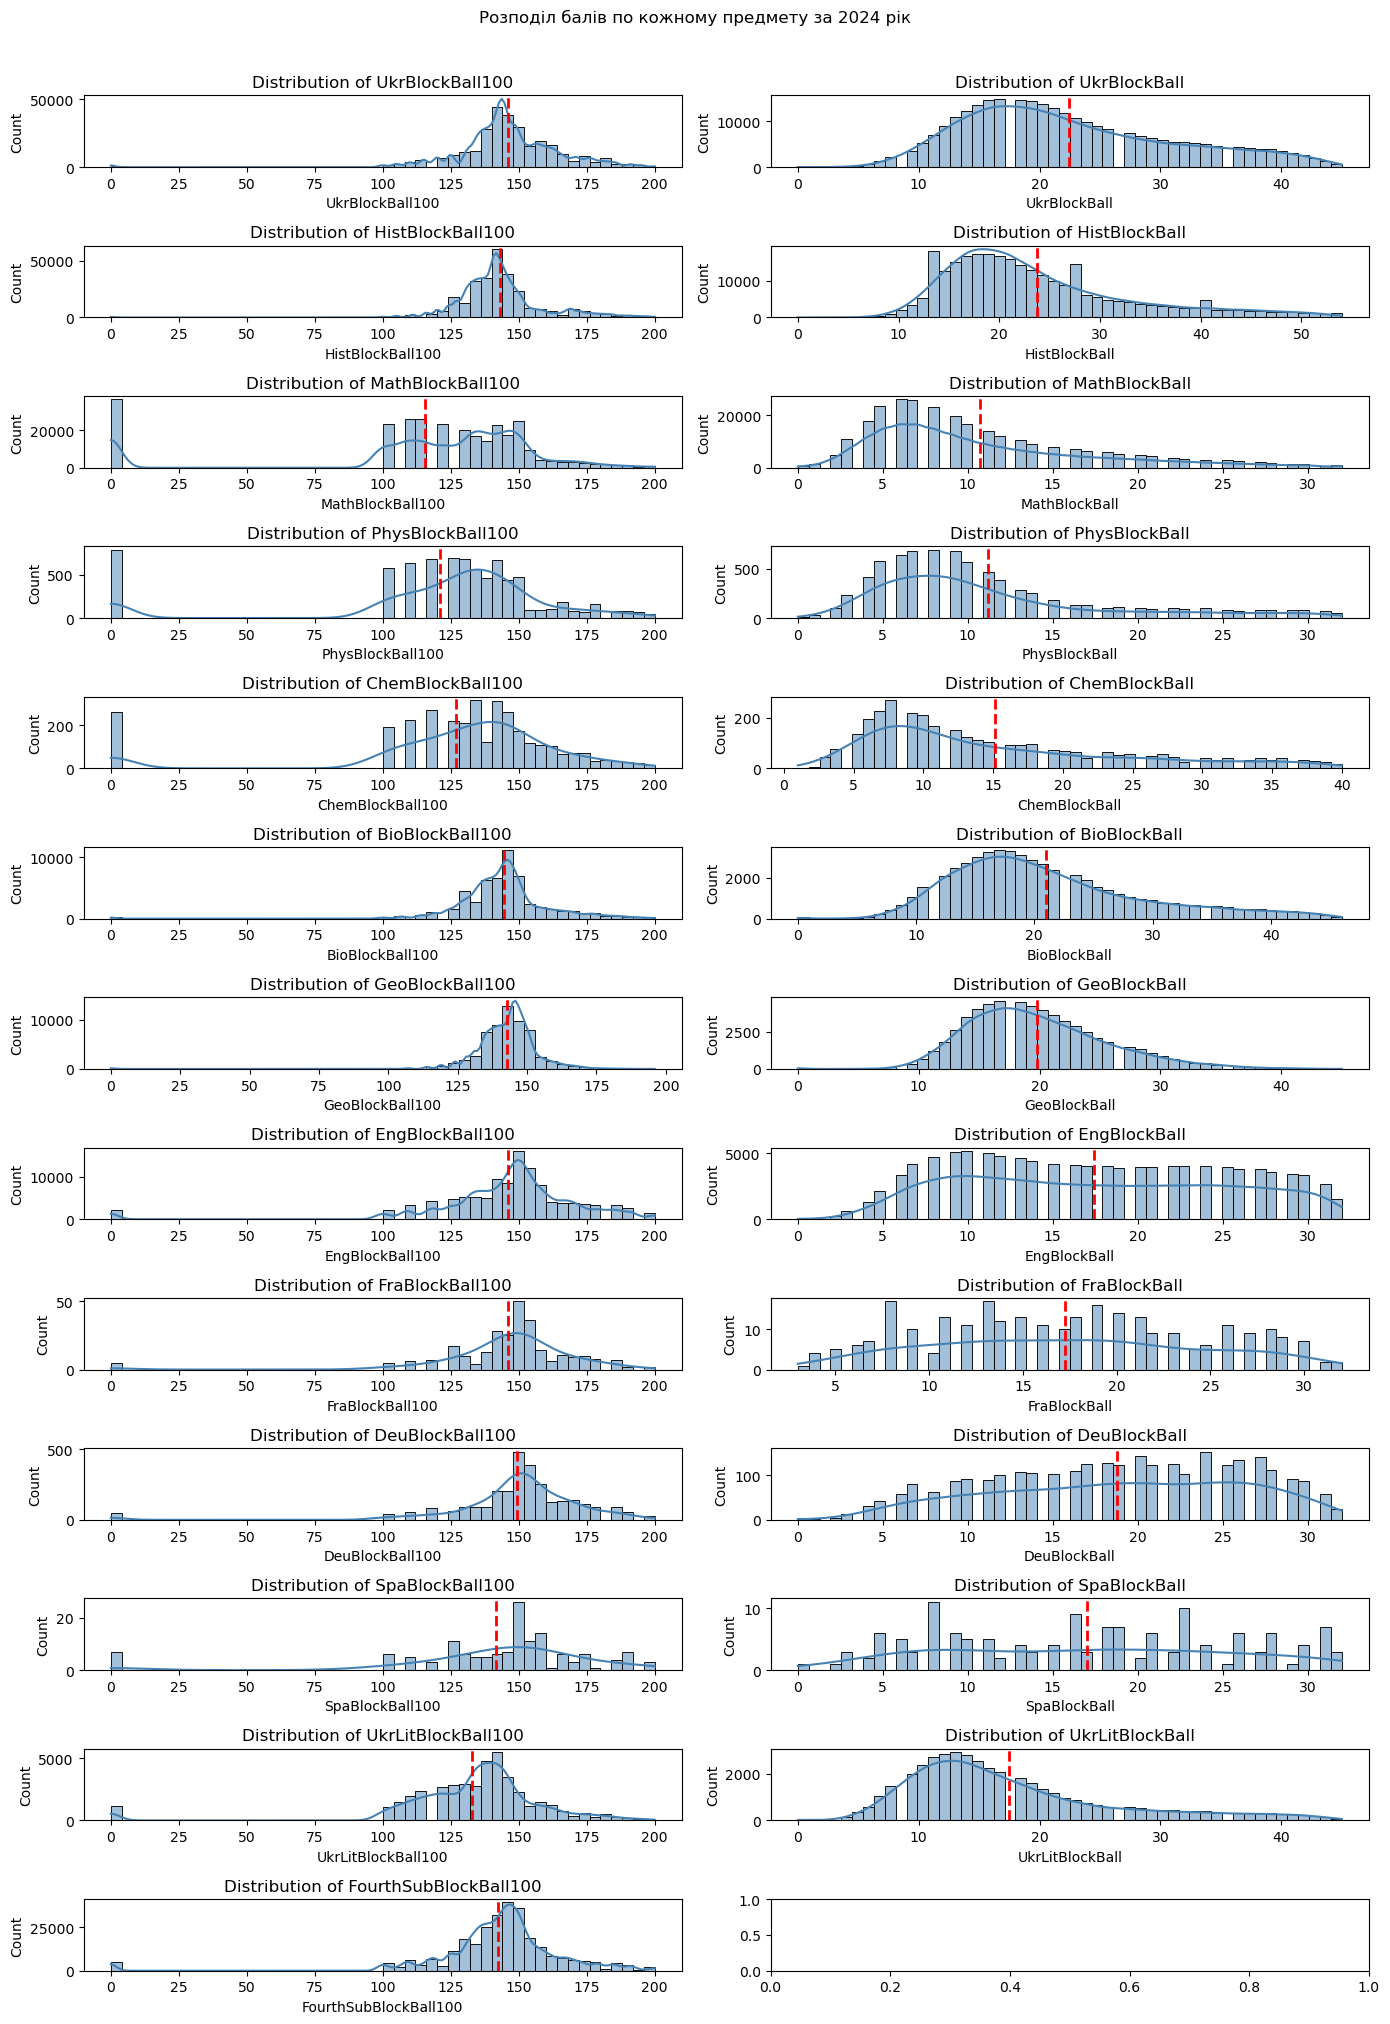

In [49]:
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(14, 20))   # двовимірний масив
axes = axes.flatten()                                           # перетворюємо на одновимірний список, щоб у циклі не думати про рядки/стовпці

for i, col in enumerate(numeric_cols):
    sns.histplot(df_all[df_all["year"] == 2024][col],
                 kde=True, 
                 ax=axes[i],
                 bins=50,
                 color='steelblue')
    
    mean_ball = df_all[df_all["year"] == 2024][col].dropna().mean()
    
    axes[i].axvline(x=mean_ball,
                color='red', 
                linestyle='dashed', 
                linewidth=2)
    axes[i].set_title(f'Distribution of {col}')

fig.suptitle('Розподіл балів по кожному предмету за 2024 рік', y=1.01)
plt.tight_layout()
plt.show()

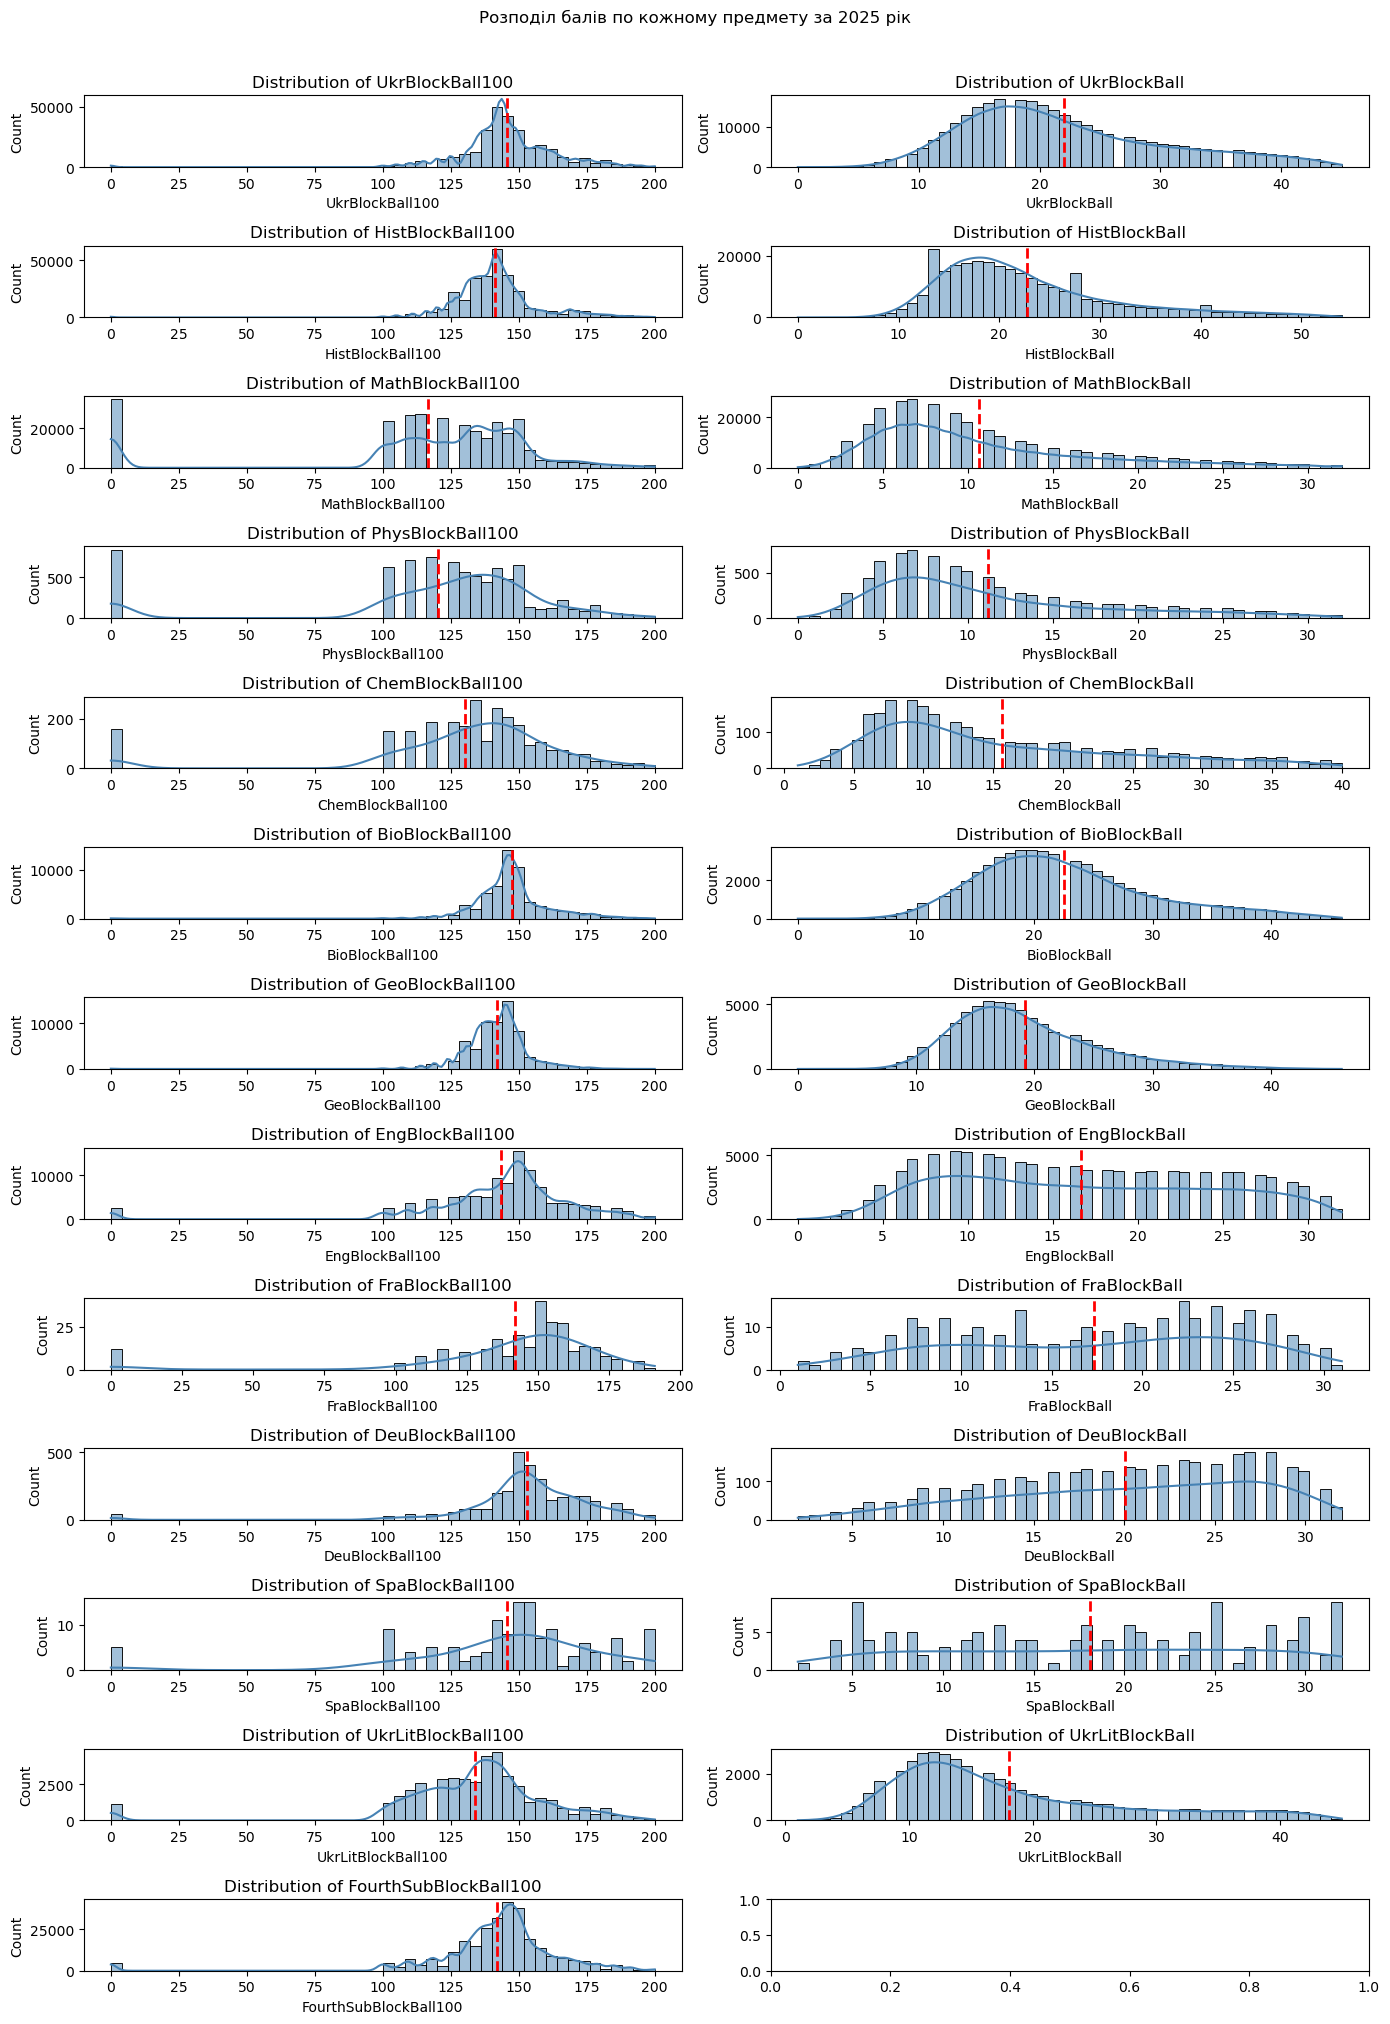

In [50]:
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(14, 20))   # двовимірний масив
axes = axes.flatten()                                           # перетворюємо на одновимірний список, щоб у циклі не думати про рядки/стовпці

for i, col in enumerate(numeric_cols):
    sns.histplot(df_all[df_all["year"] == 2025][col],
                 kde=True, 
                 ax=axes[i],
                 bins=50,
                 color='steelblue')
    
    mean_ball = df_all[df_all["year"] == 2025][col].dropna().mean()
    
    axes[i].axvline(x=mean_ball,
                color='red', 
                linestyle='dashed', 
                linewidth=2)
    axes[i].set_title(f'Distribution of {col}')

fig.suptitle('Розподіл балів по кожному предмету за 2025 рік', y=1.01)
plt.tight_layout()
plt.show()

<p style='color:steelblue; font-weight: 700;'>На візуальзаціях зліва показано розподіл результату НМТ з кожного предмету в 200-бальній шкалі. А праворуч - розподіл набраних за тест з предмету балів (для кожного предмету ця кількість балів різна, залежно від кількості завдань). Червоною лінією зображено середнє значення по предмету. З розподілів видно складність написання математики, фізики та хімії.</p>

## 3. Формулювання запитань, відповіді на які дозволять сформувати висновки для освітньої політики та нададуть можливість удосконалити весь процес проведення НМТ.

### 3.1. Чи є тенденція до зменшення кількості учасників НМТ за кордом?
#### Побудуємо зведену таблицю щодо зареєстрованих учасників в НМТ по роках залежно від країни проходження.

In [51]:
pivot_region_2024 = (
    df_all[df_all["year"] == 2024]
    .pivot_table(
        index='RegionGroup',
        columns='RegTypeName',
        values='outid',
        aggfunc='nunique',
        fill_value=0
    )
    .sort_index()
)

pivot_region_2025 = (
    df_all[df_all["year"] == 2025]
    .pivot_table(
        index='RegionGroup',
        columns='RegTypeName',
        values='outid',
        aggfunc='nunique',
        fill_value=0
    )
    .sort_index()
)

pivot_region_2024['Загалом зареєстровано в 2024'] = pivot_region_2024.sum(axis=1)
pivot_region_2025['Загалом зареєстровано в 2024'] = pivot_region_2025.sum(axis=1)

concatenated_df = pd.concat([pivot_region_2024, pivot_region_2025], keys=[2024, 2025], axis=1)
print("Зведені дані щодо учасників НМТ за країною проходження в розрізі статусу учасника")
concatenated_df

Зведені дані щодо учасників НМТ за країною проходження в розрізі статусу учасника


2024                           \
RegTypeName     Випускник минулих років Випускник поточного року   
RegionGroup                                                        
Ірландія                             89                      424   
Іспанія                              22                      160   
Італія                               90                      389   
Австрія                              64                      549   
Азербайджан                           9                       33   
Бельгія                              68                      284   
Болгарія                            137                      483   
Велика Британія                     108                      518   
Грузія                               23                      133   
Данія                                27                      149   
Естонія                              39                      158   
Канада                               62                      200   
Латвія                               40                      168   
Литва                                57                      437   
Люксембург                           15                       98   
Молдова                              51                      136   
Норвегія                             50                      225   
Нідерланди                          111                      408   
Німеччина                           927                     5344   
Польща                              987                     4899   
Португалія                           24                      115   
Румунія                              16                       89   
США                                  52                      179   
Словаччина                           85                      356   
Словенія                              0                        0   
Туреччина                            29                      134   
Угорщина                             23                      134   
Україна                           74582                   216177   
Франція                              65                      392   
Фінляндія                            15                      137   
Хорватія                              7                       36   
Чехія                               267                     1046   
Швейцарія                            18                      166   
Швеція                               28                      138   

                                                                          \
RegTypeName     Установа виконання покарань Загалом зареєстровано в 2024   
RegionGroup                                                                
Ірландія                                  0                          513   
Іспанія                                   0                          182   
Італія                                    0                          479   
Австрія                                   0                          613   
Азербайджан                               0                           42   
Бельгія                                   0                          352   
Болгарія                                  0                          620   
Велика Британія                           0                          626   
Грузія                                    0                          156   
Данія                                     0                          176   
Естонія                                   0                          197   
Канада                                    0                          262   
Латвія                                    0                          208   
Литва                                     0                          494   
Люксембург                                0                          113   
Молдова                                   0                          187   
Норвегія                                  0                          275  

#### Порівняльна візуалізація учасників за кордоном за 2024 vs 2025 роки.

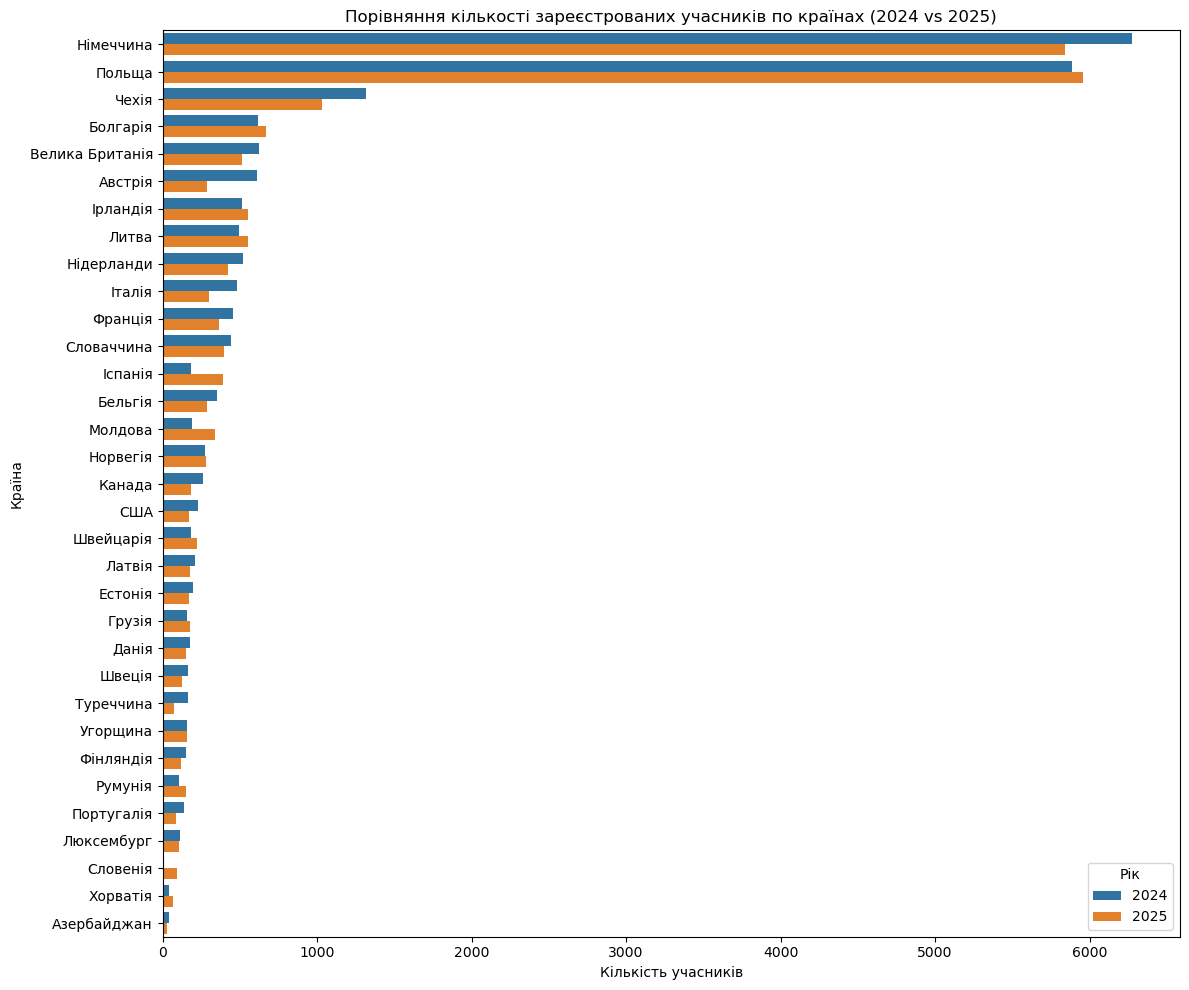

In [52]:
# Витягуємо тільки сумарну кількість по кожному року
plot_df = (
    concatenated_df.xs('Загалом зареєстровано в 2024', axis=1, level=1)
    .reset_index()
    # .rename(columns={'2024 рік': 2024, '2025 рік': 2025})
)

# Переведемо в long-формат для Seaborn
plot_df = plot_df.melt(
    id_vars='RegionGroup',
    var_name='Рік',
    value_name='Кількість'
)

# Виключаємо Україну
plot_df = plot_df[plot_df['RegionGroup'] != 'Україна']

# Відсортуємо країни за загальною кількістю (для краси)
plot_df['RegionGroup'] = plot_df['RegionGroup'].astype(str)
plot_df = plot_df.sort_values('Кількість', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(
    data=plot_df,
    y='RegionGroup',
    x='Кількість',
    hue='Рік',
    palette=palette
)

plt.title('Порівняння кількості зареєстрованих учасників по країнах (2024 vs 2025)', fontsize=12)
plt.xlabel('Кількість учасників')
plt.ylabel('Країна')
plt.legend(title='Рік')
plt.tight_layout()
plt.show()


<p style='color:steelblue; font-weight: 700;'>В 2025 році зберігається велика кількість українців за кордоном. В більшості країн кількість учасників дещо зменшилась в порівнянні з 2024 роком, але є і країни, де навпаки кількість зросла (Польща, Болгарія, Ірландія, Литва, Іспанія, Молдова та інші). Зменшення кількості учасників в більшості країн в 2025 році не говорить про повернення до України, можливою причиною може бути переїзд з однієї країни до іншої. Якщо заглиблюватись в аналітику учасників за кордоном, цікаво буде дослідити вік учасників.</p>

### 3.2. Як змінювалась кількість зареєстрованих учасників НМТ по областях України між 2024 і 2025 роками? І чи спостерігається зміщення регіонального розподілу учасників через міграцію або війну?
#### Зведені дані щодо учасників НМТ залежно від статусу учасника за регіоном проходження НМТ по рокам.

In [53]:
df_ukr = df_all[df_all['RegionGroup'] == 'Україна'].copy()

# Очищаємо невикористані категорії
df_ukr['PTRegName'] = df_ukr['PTRegName'].cat.remove_unused_categories()
df_ukr['RegTypeName'] = df_ukr['RegTypeName'].cat.remove_unused_categories()

pivot_ukr_region_by_status = (
    df_ukr
    .pivot_table(
        index=['PTRegName', 'year'],
        columns='RegTypeName',
        values='id_num',
        aggfunc='nunique',
        fill_value=0
    )
    .sort_index()
)
print("Зведені дані щодо учасників НМТ за регіоном проходження в Україні в розрізі статусу учасника")
pivot_ukr_region_by_status

Зведені дані щодо учасників НМТ за регіоном проходження в Україні в розрізі статусу учасника


RegTypeName                     Випускник минулих років  \
PTRegName                 year                            
Івано-Франківська область 2024                     3087   
                          2025                     3477   
Волинська область         2024                     3306   
                          2025                     2966   
Вінницька область         2024                     3037   
                          2025                     3629   
Дніпропетровська область  2024                     7759   
                          2025                     6672   
Житомирська область       2024                     2364   
                          2025                     2474   
Закарпатська область      2024                     1958   
                          2025                     1700   
Запорізька область        2024                     2572   
                          2025                     2022   
Київська область          2024                     3523   
                          2025                     4639   
Кіровоградська область    2024                     1709   
                          2025                     1682   
Львівська область         2024                     7433   
                          2025                     7034   
Миколаївська область      2024                     1775   
                          2025                     1680   
Одеська область           2024                     3798   
                          2025                     4336   
Полтавська область        2024                     3435   
                          2025                     3692   
Рівненська область        2024                     2914   
                          2025                     2802   
Сумська область           2024                     2817   
                          2025                     2467   
Тернопільська область     2024                     2743   
                          2025                     2822   
Харківська область        2024                     3997   
                          2025                     3909   
Хмельницька область       2024                     2378   
                          2025                     2496   
Черкаська область         2024                     2329   
                          2025                     2424   
Чернівецька область       2024                     1949   
                          2025                     1873   
Чернігівська область      2024                     1506   
                          2025                     1844   
м.Київ                    2024                     8193   
                          2025                     9614   

RegTypeName                     Випускник поточного року  \
PTRegName                 year                             
Івано-Франківська область 2024                      9766   
                          2025                     10204   
Волинська область         2024                      8983   
                          2025                      8993   
Вінницька область         2024                     10566   
                          2025                     10560   
Дніпропетровська область  2024                     19633   
                          2025                     18540   
Житомирська область       2024                      8592   
                          2025                      8593   
Закарпатська область      2024                      7113   
                          2025                      7409   
Запорізька область        2024                      4012   
                          2025                      3738   
Київська область          2024                     13692   
                          2025                     14056   
Кіровоградська область    2024                      5517   
                          2025                      5568   
Львівська область         2024                     19165   
                         

#### Візуалізація - розподіл учасників НМТ за регіоном реєстрації 2024 vs 2025 років.

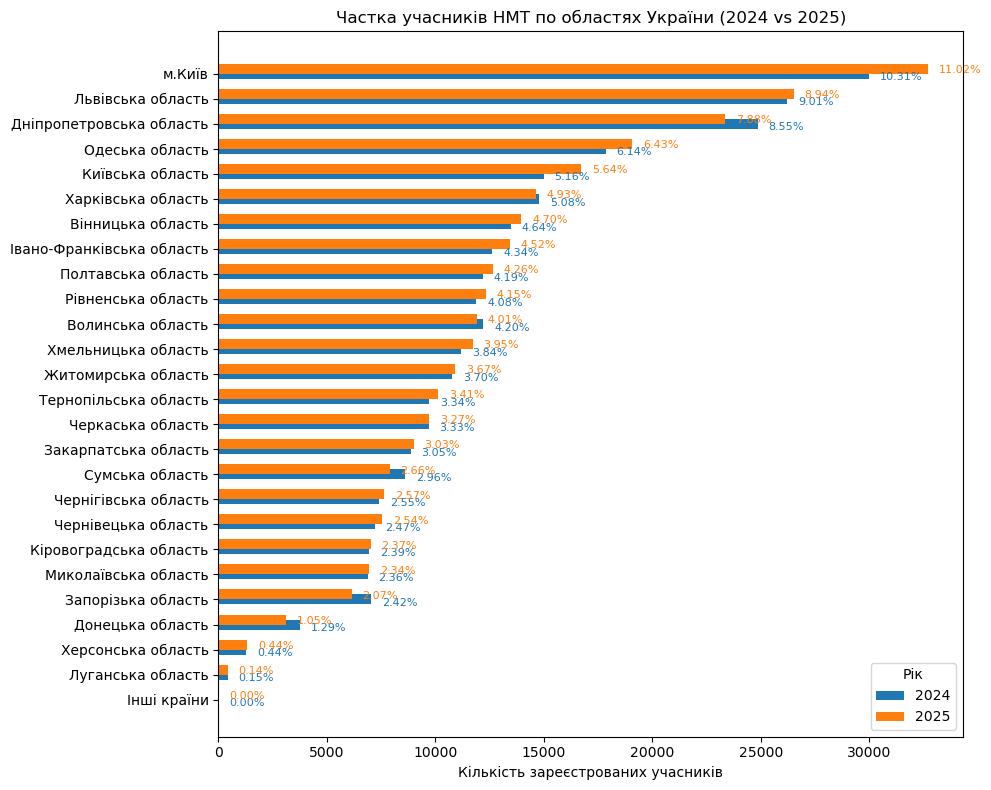

In [54]:
# Підрахунок кількості зареєстрованих по кожній області і року
pivot_ukr_region = (
    df_ukr
    .pivot_table(
        index=['RegName', 'year'],
        values='id_num',
        aggfunc='nunique',
        fill_value=0
    )
    .reset_index()
)

# Перетворимо, щоб у кожного року була окрема колонка
pivot_ukr_region_wide = pivot_ukr_region.pivot(
    index='RegName', columns='year', values='id_num').fillna(0)

# Сортуємо області за 2025 роком (для зручності візуалізації)
pivot_ukr_region_wide = pivot_ukr_region_wide.sort_values(
    by=2025, ascending=True)

# Обчислюємо відсотки для підписів
percent_2024 = pivot_ukr_region_wide[2024] / pivot_ukr_region_wide[2024].sum() * 100
percent_2025 = pivot_ukr_region_wide[2025] / pivot_ukr_region_wide[2025].sum() * 100

# Побудова горизонтальної стовпчикової діаграми
fig, ax = plt.subplots(figsize=(10, 8))
bars_2024 = ax.barh(pivot_ukr_region_wide.index, pivot_ukr_region_wide[2024],
                    height=0.4, label='2024', color='#1f77b4')
bars_2025 = ax.barh(pivot_ukr_region_wide.index, pivot_ukr_region_wide[2025],
                    height=0.4, label='2025', color='#ff7f0e', left=None, align='edge')

# Додаємо підписи у відсотках
for i, (bar24, bar25) in enumerate(zip(bars_2024, bars_2025)):
    x24 = bar24.get_width()
    x25 = bar25.get_width()
    y = bar24.get_y() + bar24.get_height() / 2

    ax.text(x24 + 500, y - 0.15, f"{percent_2024.iloc[i]:.2f}%", va='center', ha='left', fontsize=8, color='#1f77b4')
    ax.text(x25 + 500, y + 0.15, f"{percent_2025.iloc[i]:.2f}%", va='center', ha='left', fontsize=8, color='#ff7f0e')

ax.set_title('Частка учасників НМТ по областях України (2024 vs 2025)', fontsize=12)
ax.set_xlabel('Кількість зареєстрованих учасників')
ax.legend(title='Рік', loc='lower right')
plt.tight_layout()
plt.show()


<p style='color:steelblue; font-weight: 700;'>Дійсно, в 2025 році спостерігається зменшення кількості учасників порівняно з 2024 роком в таких областях, як Дніпропетровська, Сумська, Запорізька та Донецька області.</p>

### 3.3. Як змінювались вподобання учасників НМТ щодо вибору четвертого додаткового предмета у 2024 та 2025 роках? Які предмети залишаються найпопулярнішими, а які - втрачають інтерес?

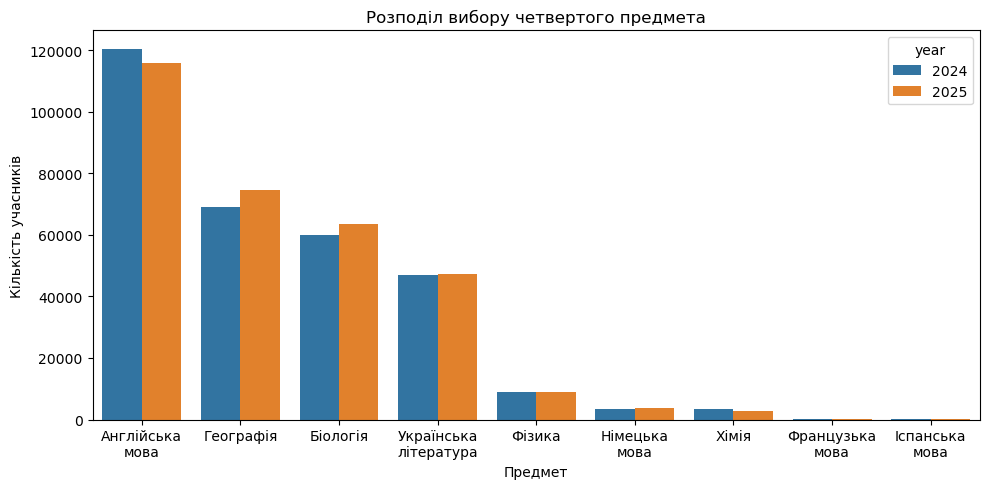

In [55]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_all,
    x="FourthSubName",
    order=df_all["FourthSubName"].value_counts().index,
    hue='year',
    palette=palette
)

tick_positions = ax.get_xticks()
new_labels = [label.replace(" ", "\n") for label in df_all["FourthSubName"].value_counts().index]
ax.set_xticks(tick_positions)
ax.set_xticklabels(new_labels)


plt.title("Розподіл вибору четвертого предмета")
plt.xlabel("Предмет")
plt.ylabel("Кількість учасників")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<p style='color:steelblue; font-weight: 700;'>Вибір четвертого предмета демонструє тенденцію до стабільності: топ-3 предмети залишаються незмінними - англійська мова, географія та біологія. Вибір англійської мови як четвертого предмета, може свідчити про високу затребуваність іноземної мови для вступу.
У 2025 році спостерігається зростання частки тих, хто обирає географію та біологію, що може свідчити про зміну профільних пріоритетів вступників.
Попит на хімію, німецьку, французьку та іспанську мови залишився стабільно низьким.</p>

### 3.4. Як змінилися середні результати з обов’язкових предметів - української мови, математики та історії України у 2025 році порівняно з 2024 в різних регіонах проходження НМТ?
#### Обчислимо середній бал не на всіх значеннях, а лише якщо бал не дорівнює нулю. Тобто для тих, хто має статус зараховано. Оскільки в даних присутні нульові бали (коли учасник не подолав поріг), за рахунок них середнє значення буде сильно занижено. Аби не занижувати бал - відфільтруємо дані.

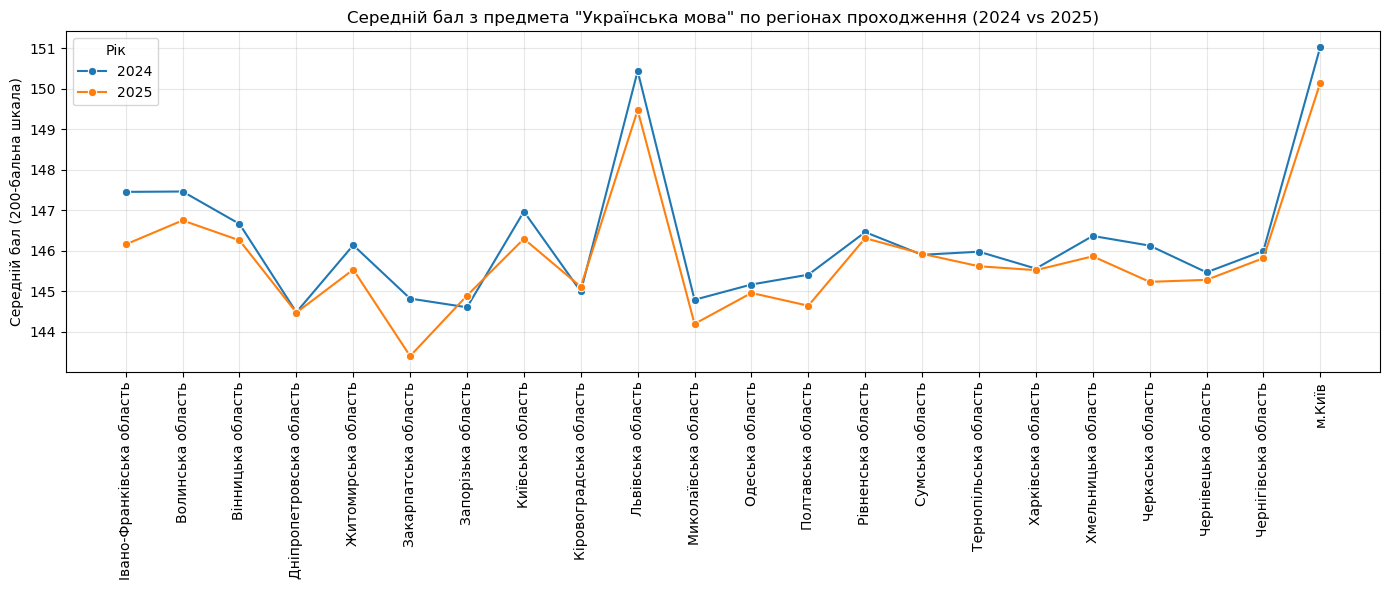

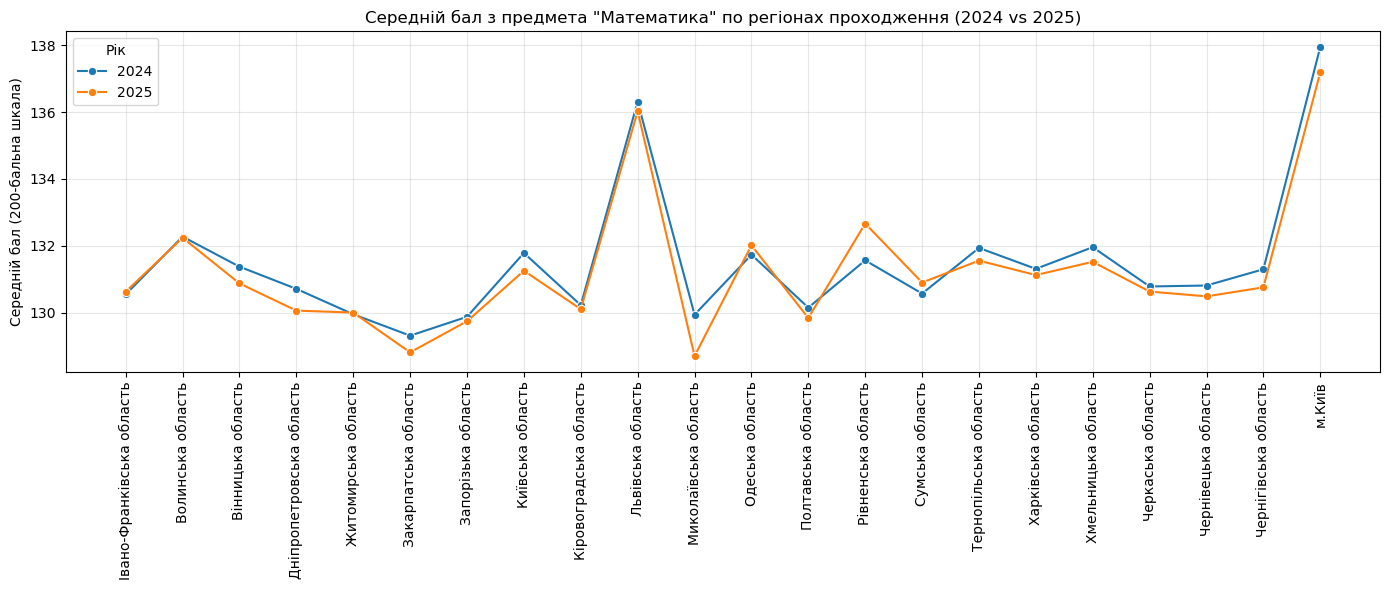

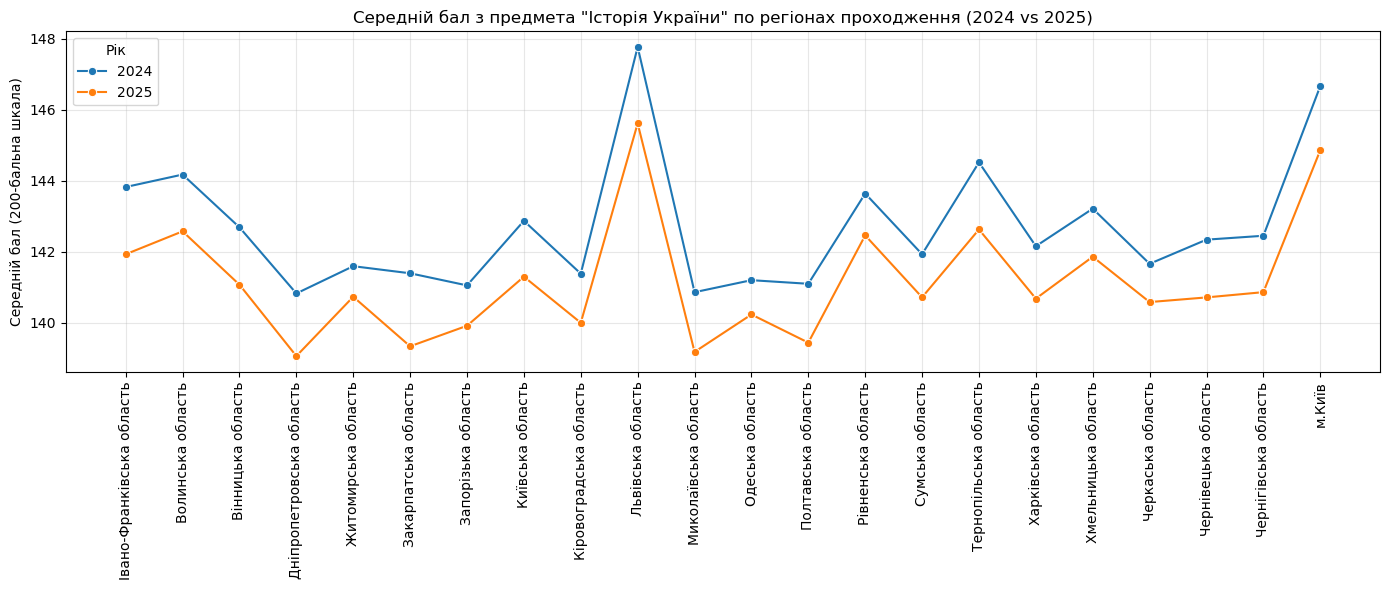

In [56]:
# Словник предметів: назва колонки → назва для графіка
subjects = {
    'UkrBlockBall100': 'Українська мова',
    'MathBlockBall100': 'Математика',
    'HistBlockBall100': 'Історія України'
}

for col, subj_name in subjects.items():
    
    df_filtered = df_ukr[
        (df_ukr['RegName'].notna()) & (df_ukr[col] > 0)
    ]
    
    scores = (
        df_filtered
        .groupby(['PTRegName', 'year'], as_index=False)[col]
        .mean()
        .rename(columns={col: 'Середній_бал'})
    )

    scores = scores.sort_values('PTRegName')
    
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=scores,
        x='PTRegName',
        y='Середній_бал',
        hue='year',
        palette=palette,
        marker='o'
    )

    plt.title(f'Середній бал з предмета "{subj_name}" по регіонах проходження (2024 vs 2025)', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Середній бал (200-бальна шкала)')
    plt.xticks(rotation=90)
    plt.legend(title='Рік')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

<p style='color:steelblue; font-weight: 700;'>Історія України: по всім областям середній бал на 1-2 зменшився. Можливою причиною може бути зміна рівня складності завдань. Лідерами серед найвищих показників є Львівська область та м. Київ, а найгірші показники в Дніпропетровській, Закарпатській, Миколаївській та Полтавській.</p>
<p style='color:steelblue; font-weight: 700;'>Українська мова: майже в усіх областях середній бал дещо знизився, або близький до результатів 2024 року. У Закарпатській області - зменшення більше ніж на 1 бал. В топ найкращих результатів є Львівська область та м. Київ, а найнижчі результати в 2025 році демонструє Закарпатська область.</p>
<p style='color:steelblue; font-weight: 700;'>Математика: незалежно від регіону, це найскладніший предмет - середні результати на 12-16 балів нижчі, ніж з української мови. По всім областям середній бал в 2025 році знизився на 0.2-1 бали. Скоріш за все, рівень складності завдань був близьким до рівня завдань 20224 року. Найвищі середні бали традиційно у Львівській області та м. Києві, а найгірші показники в Закарпатській та Миколаївській областях.</p>

In [57]:
df_filtered = df_all[df_all["MathBlockBall100"] != 0]

# Групуємо по роках і рахуємо середній бал
avg_math_by_year = (
    df_filtered.groupby("year")["MathBlockBall100"]
    .mean()
    .reset_index()
)

print(avg_math_by_year)


   year  MathBlockBall100
0  2024        132.526959
1  2025        132.274296


### 3.5. У яких регіонах частка учасників, які не склали НМТ, є найвищою, та як ці показники змінилися між 2024 і 2025 роками? Чи спостерігається загальний тренд на покращення результатів - тобто зменшення частки тих, хто не склав тестування?

#### Серед регіонів, в яких розташовано заклад освіти, в якому учасник здобув повну середню освіту є запис "Інші країни". Це означає, що такі учасники НМТ не закінчували заклад освіти в Україні (на онлайн навчанні), а продолжили навчання в закордонних закладах. Виведемо інформацію таких учасників по країнам проходження тестування.

In [58]:
# Фільтруємо лише учасників, у яких заклад освіти позначений як "Інші країни"
df_foreign = df_all[df_all['RegName'] == 'Інші країни'].copy()

# Створюємо зведену таблицю
pivot_foreign = (
    df_foreign
    .pivot_table(
        index='RegionGroup',
        columns=['RegTypeName', 'year'],
        values='id_num',
        aggfunc='nunique',
        fill_value=0
    )
    .sort_index()
)

# Додаємо загальну кількість по кожній країні
pivot_foreign['Загалом зареєстровано'] = pivot_foreign.sum(axis=1)

# Сортуємо країни за кількістю учасників (від найбільшої)
pivot_foreign = pivot_foreign.sort_values('Загалом зареєстровано', ascending=False)

print("Зведена таблиця по кількості учасників серед 'Інші країни' у розрізі статусу учасника (2024 vs 2025)")
display(pivot_foreign)

Зведена таблиця по кількості учасників серед 'Інші країни' у розрізі статусу учасника (2024 vs 2025)


RegTypeName     Випускник минулих років       Випускник поточного року       \
year                               2024  2025                     2024 2025   
RegionGroup                                                                   
Польща                              987  1203                       25   33   
Німеччина                           927  1198                       16   22   
Чехія                               267   212                        3    2   
Болгарія                            137   147                        5    1   
Нідерланди                          111   101                        1    2   
Велика Британія                     108    92                        4    6   
Ірландія                             89   103                        0    2   
Молдова                              51   124                        1    0   
Словаччина                           85    88                        0    0   
Італія                               90    72                        1    0   
Литва                                57    64                       11   15   
Канада                               62    76                        3    5   
Бельгія                              68    66                        2    2   
Франція                              65    68                        0    2   
Іспанія                              22    92                        1    2   
Норвегія                             50    54                        3    2   
США                                  52    49                        0    5   
Австрія                              64    32                        1    0   
Естонія                              39    41                        1    2   
Латвія                               40    29                        1    2   
Угорщина                             23    43                        0    1   
Грузія                               23    36                        4    3   
Данія                                27    36                        1    1   
Швейцарія                            18    44                        1    0   
Португалія                           24    19                        5    4   
Швеція                               28    23                        1    0   
Румунія                              16    32                        0    0   
Туреччина                            29    16                        0    0   
Фінляндія                            15    28                        1    0   
Люксембург                           15    22                        2    1   
Хорватія                              7    22                        0    0   
Словенія                              0    22                        0    1   
Азербайджан                           9     8                        0    2   
Україна                               0     0                        0    0   

RegTypeName     Установа виконання покарань      Загалом зареєстровано  
year                                   2024 2025                        
RegionGroup                                                             
Польща                                    0    0                  2248  
Німеччина                                 0    0                  2163  
Чехія                                     0    0                   484  
Болгарія                                  0    0                   290  
Нідерланди                                0    0                   215  
Велика Британія                           0    0                   210  
Ірландія                                  0    0                   194  
Молдова                                   0    0                   176  
Словаччина                                0    0                   173  
Італія                                    0    0                   163  
Литва                                     0    0                   147  
Канада                                    0    0      

#### Візуалізуємо частку учасників по регіону розташування закладу освіти, в якому учасники здобули повну середню освіту (2024 vs 2025).

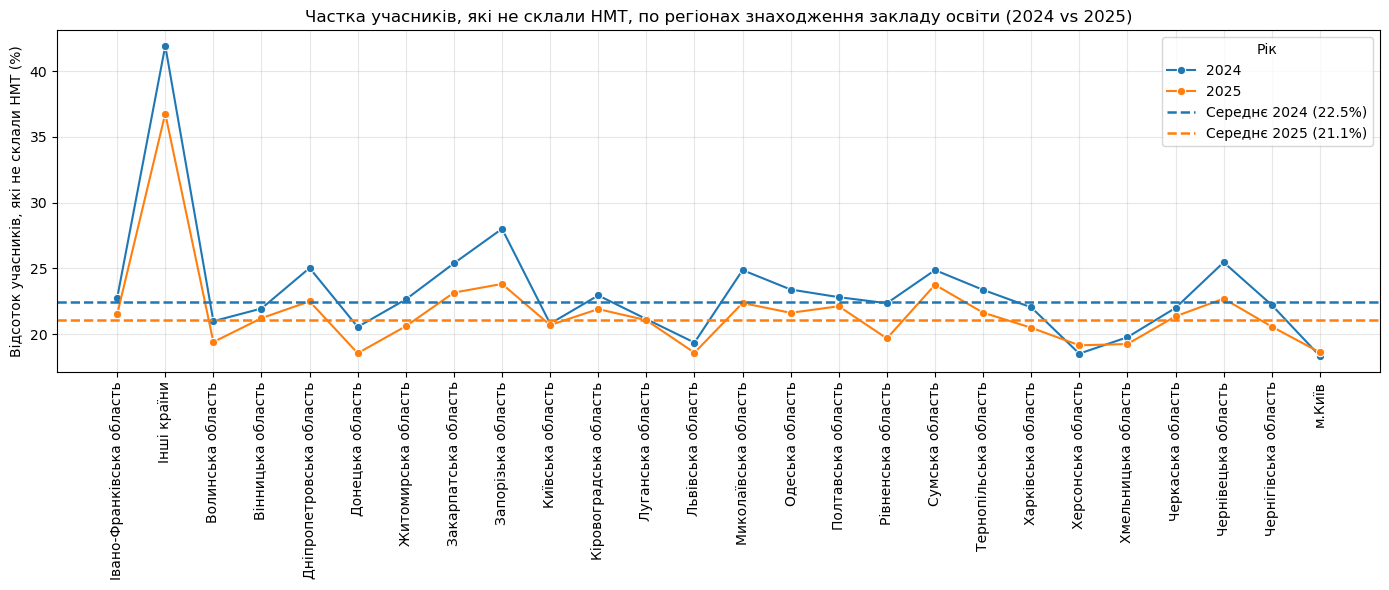

In [59]:
fail_share = (
    df_all
    .groupby(['RegName', 'year'], as_index=False)
    .agg(
        total_participants=('id_num', 'nunique'),
        failed=('OverallResult', lambda x: (x == 'Не склав').sum())
    )
)

# Розрахунок відсотку
fail_share['Відсоток не склали'] = (fail_share['failed'] / fail_share['total_participants']) * 100

# Сортуємо області в алфавітному порядку
fail_share = fail_share.sort_values('RegName')

# Фільтруємо лише українські регіони (без "Інші країни")
fail_share_ukr = fail_share[fail_share['RegName'] != 'Інші країни'].copy()

# Розрахунок середнього значення по кожному року (без "Інші країни")
mean_by_year = (
    fail_share_ukr
    .groupby('year')['Відсоток не склали']
    .mean()
)

# Побудова графіка
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=fail_share,
    x='RegName',
    y='Відсоток не склали',
    hue='year',
    palette=palette,
    marker='o'
)

# Додаємо горизонтальні лінії для кожного року
for year, mean_val in mean_by_year.items():
    if year == 2024:
        plt.axhline(
            y=mean_val, linestyle='--', 
            color='#1f77b4', linewidth=1.8, 
            label=f'Середнє {year} ({mean_val:.1f}%)'
        )
    elif year == 2025:
        plt.axhline(
            y=mean_val, linestyle='--', 
            color='#ff7f0e', linewidth=1.8, 
            label=f'Середнє {year} ({mean_val:.1f}%)'
        )

plt.title('Частка учасників, які не склали НМТ, по регіонах знаходження закладу освіти (2024 vs 2025)', fontsize=12)
plt.xlabel('')
plt.ylabel('Відсоток учасників, які не склали НМТ (%)')
plt.xticks(rotation=90)
plt.legend(title='Рік')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<p style='color:steelblue; font-weight: 700;'>Спостеріється тенденція до зменшення кількості тих, хто не склав НМТ. По більшості областям за 2025 рік відсоткове значення не склавших НМТ менше за середнє значення не склавших НМТ по Україні за 2024 рік - це 22.5%. Але все ж, показники не склавших залишаються досить високими, це кожен п'ятий учасник - не здав НМТ. Що стосується учасників, які отримують освіту за кордоном - тут ситуація майже в 2 рази гірша. </p>

### 3.6. Які регіони розташування навчальних закладів мають найбільший відсоток 200-бальників?

#### Побудуємо теплову діаграму по рокам для всіх предметів, окрім незатребуваних іноземних мов (німецька, франзузька та іспанська мови) по регіонам знаходження закладів здобування освіти.

In [61]:
df_2024_clear = df_all[df_all["year"] == 2024].copy()
df_2025_clear = df_all[df_all["year"] == 2025].copy()

In [63]:
subjects = {
    'UkrBlockBall100': 'Українська мова',
    'MathBlockBall100': 'Математика',
    'HistBlockBall100': 'Історія України',
    'PhysBlockBall100': 'Фізика',
    'ChemBlockBall100': 'Хімія',
    'BioBlockBall100': 'Біологія',
    'GeoBlockBall100': 'Географія',
    'EngBlockBall100': 'Англійська мова',
    'UkrLitBlockBall100': 'Українська література'
}

#### Реалізуємо дві метрики:  
##### 1. Відсоток 200-бальників серед тих, хто складав предмет у регіоні (оцінка успішності регіону в межах предмета).
##### 2. Відсоток 200-бальників у регіоні відносно всіх 200-бальників по Україні (оцінка внеску регіону у загальний результат).

In [64]:
def calculate_200_scores(df, subjects, region_col='RegName'):
    success_by_region = {}
    contribution_by_region = {}

    for col, name in subjects.items():
        # Вибираємо лише ті рядки, де учасник складав цей предмет
        df_subject = df[[region_col, col]].dropna(subset=[col])

        # Метрика 1: Успішність у регіоні
        grouped = df_subject.groupby(region_col)[col]
        percent_success = (
            grouped.apply(lambda x: (x == 200).sum()) / grouped.count() * 100
        ).round(2)
        success_by_region[name] = percent_success

        # Метрика 2: Внесок у загальний результат
        df_has_200 = df_subject[df_subject[col] == 200]
        count_by_region = df_has_200.groupby(region_col)[col].count()
        total_200 = count_by_region.sum()

        # Уникаємо ділення на 0
        if total_200 == 0:
            percent_contribution = count_by_region.copy()
            percent_contribution[:] = 0.0
        else:
            percent_contribution = (count_by_region / total_200 * 100).round(2)

        contribution_by_region[name] = percent_contribution

    return success_by_region, contribution_by_region

#### Створюємо словники по рокам, де `success_by_region_2024` - словник: предмет → Series з регіонами та відсотком 200-бальників серед тих, хто складав; `contribution_by_region_2024` - словник: предмет → Series з регіонами та внеском у загальну кількість 200-бальників. І аналогічно за 2025 рік.


In [65]:
success_by_region_2024, contribution_by_region_2024 = calculate_200_scores(df_2024_clear, subjects)
success_by_region_2025, contribution_by_region_2025 = calculate_200_scores(df_2025_clear, subjects)

#### Перетворюємо словники у датафрейми.

In [66]:
df_success_2024 = pd.DataFrame(success_by_region_2024).fillna(0).T
df_success_2024.rename(index=subjects, inplace=True)

df_success_2025 = pd.DataFrame(success_by_region_2025).fillna(0).T
df_success_2025.rename(index=subjects, inplace=True)

df_contribution_2024 = pd.DataFrame(contribution_by_region_2024).fillna(0).T
df_contribution_2024.rename(index=subjects, inplace=True)

df_contribution_2025 = pd.DataFrame(contribution_by_region_2025).fillna(0).T
df_contribution_2025.rename(index=subjects, inplace=True)

In [67]:
def plot_yearly_heatmaps(df_2024, df_2025, title_2024='2024', title_2025='2025'):
    fig, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

    sns.heatmap(
        df_2024,
        ax=axes[0],
        annot=True,
        fmt='.2f',
        cmap='YlGnBu',
        annot_kws={"size": 8},
        cbar=True,
        linewidths=0.5
    )
    axes[0].set_title(f'Відсоток 200-бальників по регіонах - {title_2024}', fontsize=12)
    axes[0].set_xlabel('Регіон')

    sns.heatmap(
        df_2025,
        ax=axes[1],
        annot=True,
        fmt='.2f',
        cmap='YlOrRd',
        annot_kws={"size": 8},
        cbar=True,
        linewidths=0.5
    )
    axes[1].set_title(f'Відсоток 200-бальників по регіонах - {title_2025}', fontsize=12)
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

Відсоток 200-бальників серед тих, хто складав предмет у регіоні (оцінка успішності регіону в межах предмета).


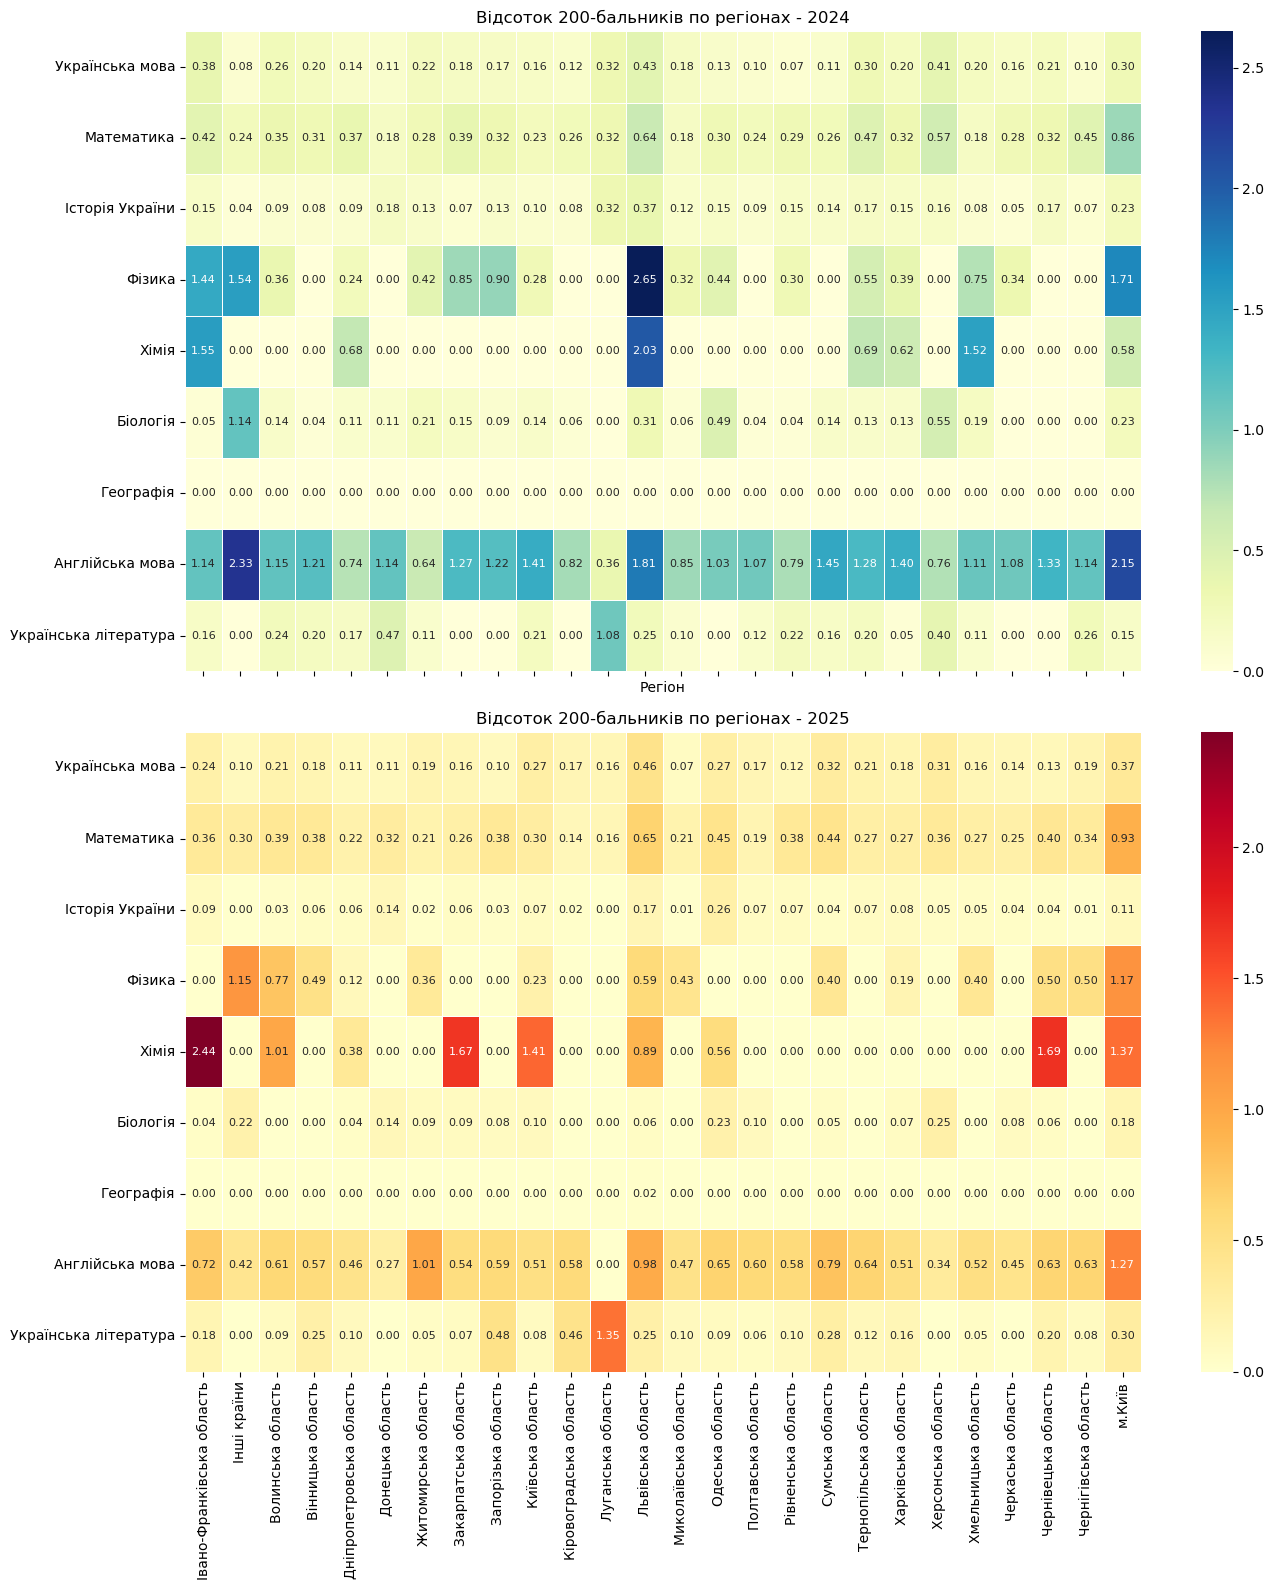

In [68]:
print("Відсоток 200-бальників серед тих, хто складав предмет у регіоні (оцінка успішності регіону в межах предмета).")
plot_yearly_heatmaps(df_success_2024, df_success_2025)

Відсоток 200-бальників у регіоні відносно всіх 200-бальників по Україні (оцінка внеску регіону у загальний результат).


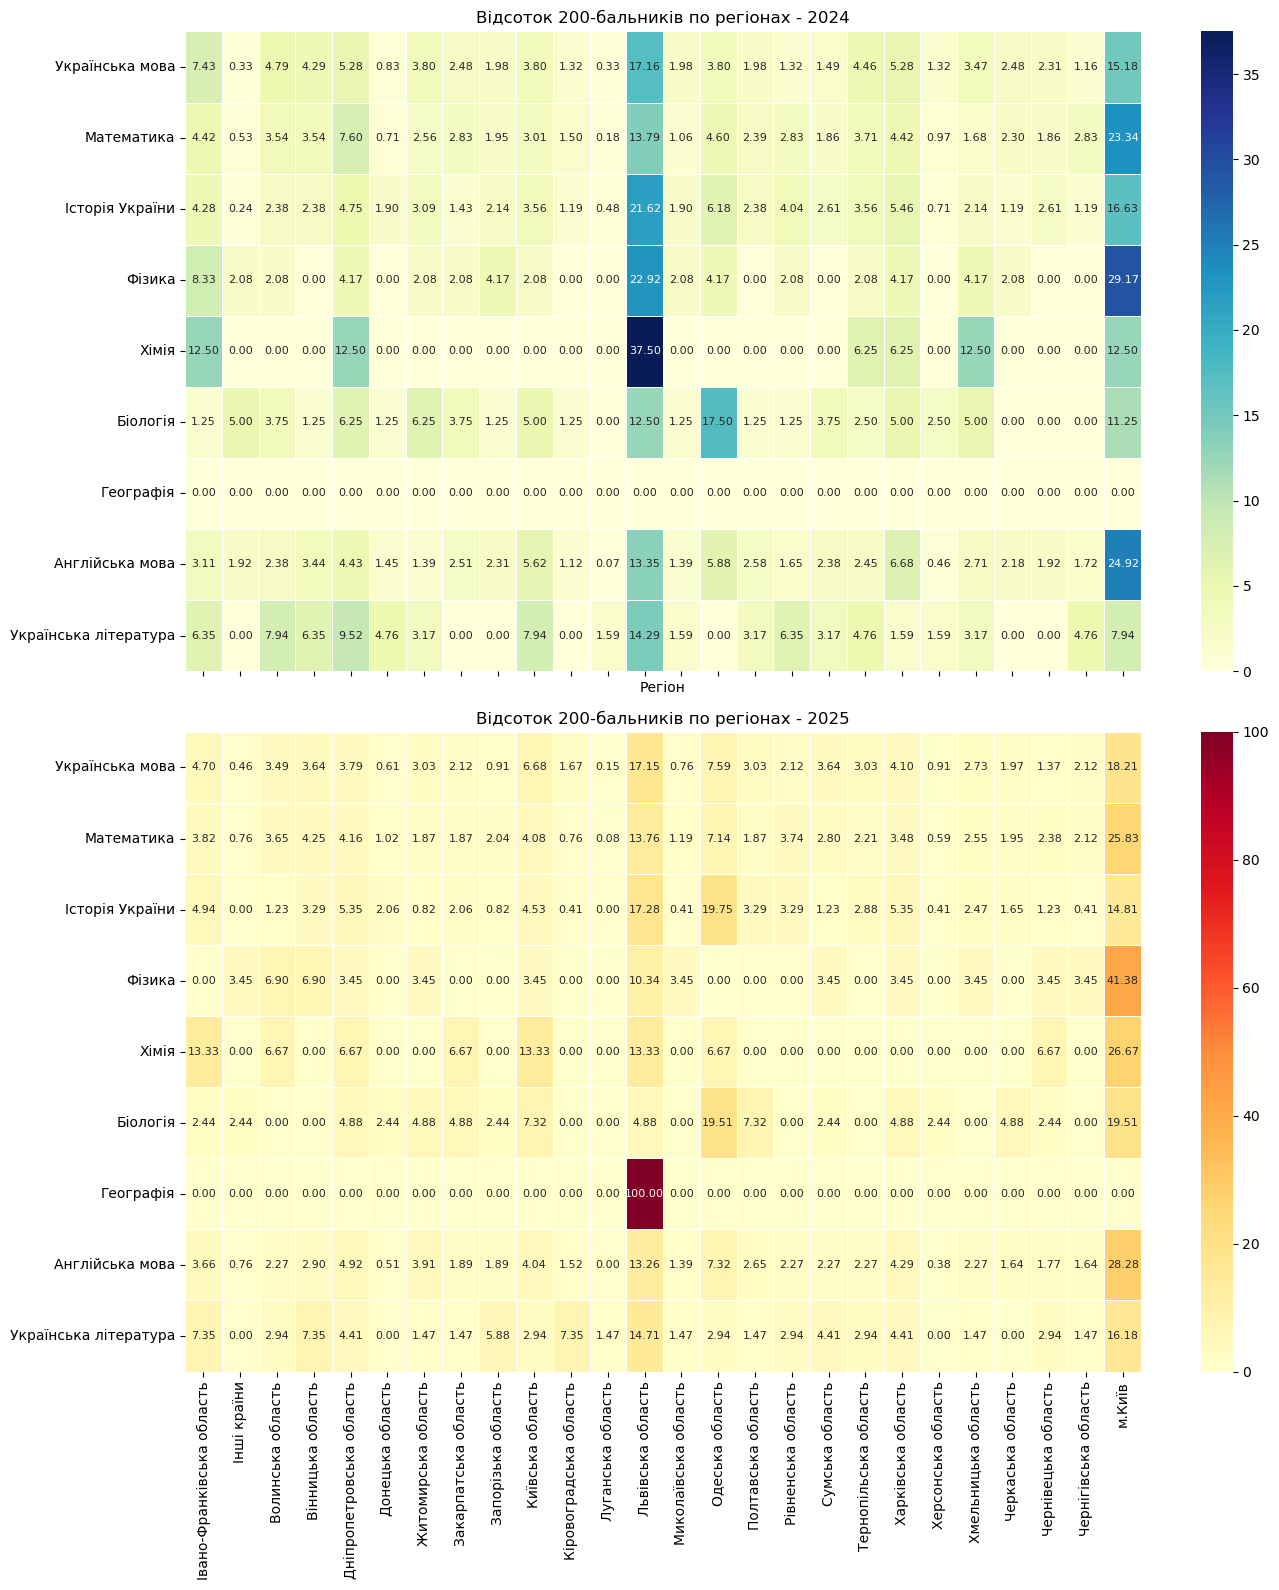

In [69]:
print("Відсоток 200-бальників у регіоні відносно всіх 200-бальників по Україні (оцінка внеску регіону у загальний результат).")
plot_yearly_heatmaps(df_contribution_2024, df_contribution_2025)

In [70]:
print(f'Кількість учасників, що здали географію на 200 балів - {df_all[df_all['GeoBlockBall100'] == 200].shape[0]}.')

Кількість учасників, що здали географію на 200 балів - 1.


<p style='color:steelblue; font-weight: 700;'> З першої візуалізації можна оцінити успішность регіону в межах предмета, тобто побачити в яких областях учасники краще справляються з предметом. З української мови та матетики немає відношення в десятки разів в областях (а лише в 3-4 рази) з маленькою кількість учасників (до прикладу Миколаївська та Кіровоградська області) та з великою кількість учасників (Львівська область, м.Київ), а це означає, що всюди є гарно підготовлені участники. В 2025 році суттєво зріс рівень складності тесту з історії України. Наявність 200 бальників з англійської мови може свідчити про не досить складний тест, а також про те, що англійську вибирають ті - хто має знання з цього предмета.</p>
<p style='color:steelblue; font-weight: 700;'> В попередньому пункті дослідження було встановлено, що найвищі середні бали показують заклади освіти в Львівській області та м.Києві. Ці ж області роблять високий внесок в кількість учасників з максимальним балом 200. В 2024 році не було результату 200 з географії, а в 2025 з'явився 1 такий учасник - у Львівській області. Також значні внески в загальний результат роблять Івано-Франківська, Дніпропетровська та Одеська області. Навчальні заклади цих областей можна окремо проаналізувати і зробити висновки чи залежить рівень підготовки учнів від типу закладу освіти (ліцей чи заклад фахової передвищої освіти), а також перейняти досвід в підготовці до НМТ в закладах з найкращими показниками і запровадити в інших регіонах.</p>

### 3.7. Чи існує статистично значуща різниця між середніми балами учасників різної статі?
#### Побудуємо графік розподілу балів з математики залежно від статі по рокам проведення тестування.

In [71]:
colors_for_gender = {
    "чоловіча": "#2ca02c",
    "жіноча": "#d62728",
}

def plot_gender_histogram(year, df):
    df_year = df[df["year"] == year][["SexTypeName", "MathBlockBall100"]].dropna()

    plt.figure(figsize=(12, 5))
    
    for gender in ["чоловіча", "жіноча"]:
        if gender == "чоловіча":
            bins=70
        else:
            bins=60

        df_gender = df_year[df_year["SexTypeName"] == gender]
        mean_score = df_gender["MathBlockBall100"].mean()
        
        sns.histplot(
            data=df_year[df_year["SexTypeName"] == gender],
            x="MathBlockBall100",
            bins=bins,
            stat='percent',
            color=colors_for_gender[gender],
            label=gender.capitalize(),
            alpha=0.7,
            zorder=1
        )

        # Додаємо вертикальну лінію середнього
        plt.axvline(
            mean_score,
            color=colors_for_gender[gender],
            linestyle="--",
            linewidth=2,
            label=f"Середнє ({gender}): {mean_score:.1f}",
            zorder=2
        )

    plt.legend()
    plt.xlabel("Бали з математики")
    plt.ylabel('Відсоток учасників')
    plt.title(f"Розподіл балів з математики за статтю ({year})")
    plt.tight_layout()
    plt.show()

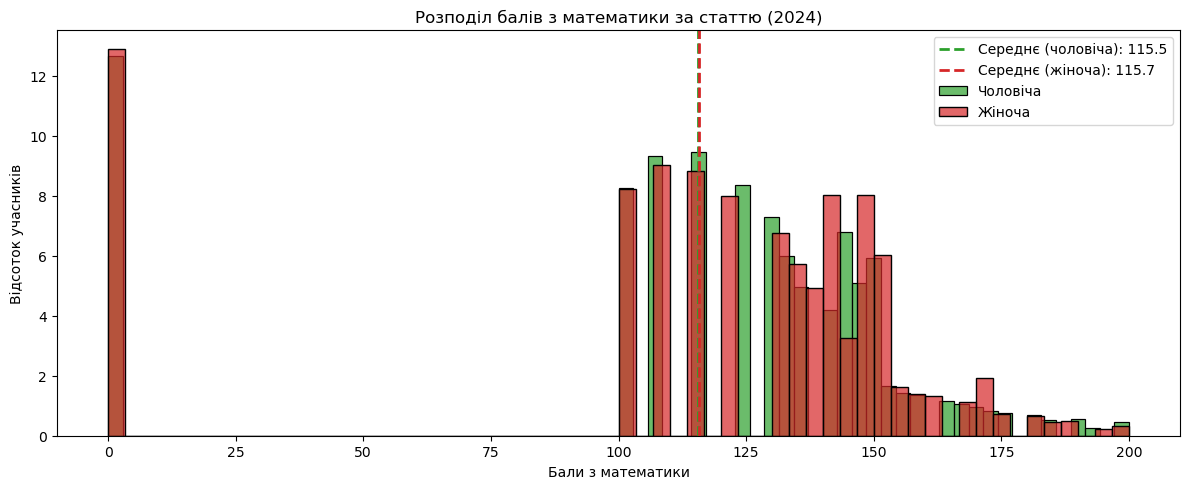

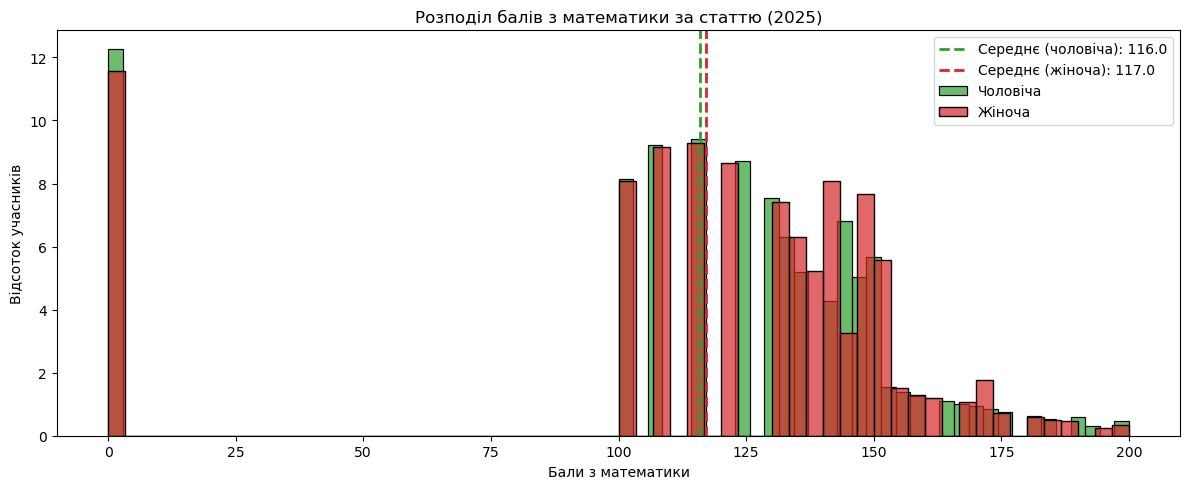

In [72]:
for year in [2024, 2025]:
    plot_gender_histogram(year, df_all)

#### Застосуємо t-тест для незалежних вибірок для порівняння середніх балів з математики між учасниками різної статі (за кожен рік окремо).  
##### *Формулювання гіпотези:*
##### - Нульова гіпотеза (H0): середні бали з математики не відрізняються між статями.
##### - Альтернативна гіпотеза (H1): середні бали з математики відрізняються між статями.

In [73]:
# df_gender_2024 = df_all[df_all['year'] == 2024][['SexTypeName', 'MathBlockBall100']].dropna()
# df_gender_2025 = df_all[df_all['year'] == 2025][['SexTypeName', 'MathBlockBall100']].dropna()

In [74]:
def math_stat_gender(year, df):
    df_year = df[df["year"] == year][["SexTypeName", "MathBlockBall100"]].dropna()

    # Розділяємо на групи
    boys = df_year[df_year['SexTypeName'] == 'чоловіча']['MathBlockBall100']
    girls = df_year[df_year['SexTypeName'] == 'жіноча']['MathBlockBall100']
    
    # Виконуємо t-тест
    t_stat, p_value = ttest_ind(girls, boys, equal_var=False)

    print(f"Кількість чоловіків/жінок в {year} році: {len(boys)} / {len(girls)}")
    
    print(f"t-статистика для {year} року: {t_stat:.3f}")
    print(f"p-значення для {year} року: {p_value:.8f}")
    
    if p_value < 0.05:
        print(f"✅ Відхиляємо H0. Є статистично значуща різниця між середніми балами чоловічої та жіночої статі в {year} році.")
    else:
        print(f"❌ Не відхиляємо H0. Немає статистично значущої різниці між середніми балами чоловічої та жіночої статі в {year} році.")

In [75]:
for year in [2024, 2025]:
    math_stat_gender(year, df_all)

Кількість чоловіків/жінок в 2024 році: 142216 / 141154
t-статистика для 2024 року: 0.999
p-значення для 2024 року: 0.31788785
❌ Не відхиляємо H0. Немає статистично значущої різниці між середніми балами чоловічої та жіночої статі в 2024 році.
Кількість чоловіків/жінок в 2025 році: 137008 / 152654
t-статистика для 2025 року: 5.919
p-значення для 2025 року: 0.00000000
✅ Відхиляємо H0. Є статистично значуща різниця між середніми балами чоловічої та жіночої статі в 2025 році.


<p style='color:steelblue; font-weight: 700;'> У 2024 році немає статистично значущої різниці між середніми балами чоловіків і жінок. Проте у 2025 році виявлено статистично значущу різницю (на рівні значущості 5%) між середніми балами чоловіків і жінок. Це означає, що стать впливала на результати - середній бал у жінок був вищим, і ця різниця не є випадковою. Різниця між роками може свідчити про зміни в освітній політиці, умовах складання іспиту, або соціальні фактори, які по-різному вплинули на учасників.</p>

### 3.8. Яка частка учасників у кожному регіоні закладу освіти набрала щонайменше 130 балів з усіх чотирьох предметів НМТ (українська мова, математика, історія України та четвертий обраний предмет), і як ця частка змінилася між 2024 та 2025 роками?

#### Загальна вимога для вступу на бюджет на більшість спеціальностей - це мінімальний середній бал 130. Цей бал розраховується залежно від обраної спеціальності. Для кожної спеціальності є [вагові коефіцієнти](https://osvita.ua/consultations/bachelor/10025/) по кожному предмету. За умови, що кількість набраних балів по кожному з чотирьох перерахованих предметів буде від 130 балів, тоді незалежно від вагових коефіцієнтів - розрахований середній бал буде дорівнювати не менше 130 балів (додала трохи математичних роздумів). Проаналізувати як працює формула розрахунку середнього балу можна [за посиланням](https://buki.com.ua/news/yak-samostiyno-rozrakhuvaty-konkursnyy-bal-pry-vstupi-do-vnz/).

In [76]:
subjects_130 = ['UkrBlockBall100', 'MathBlockBall100', 'HistBlockBall100', 'FourthSubBlockBall100']

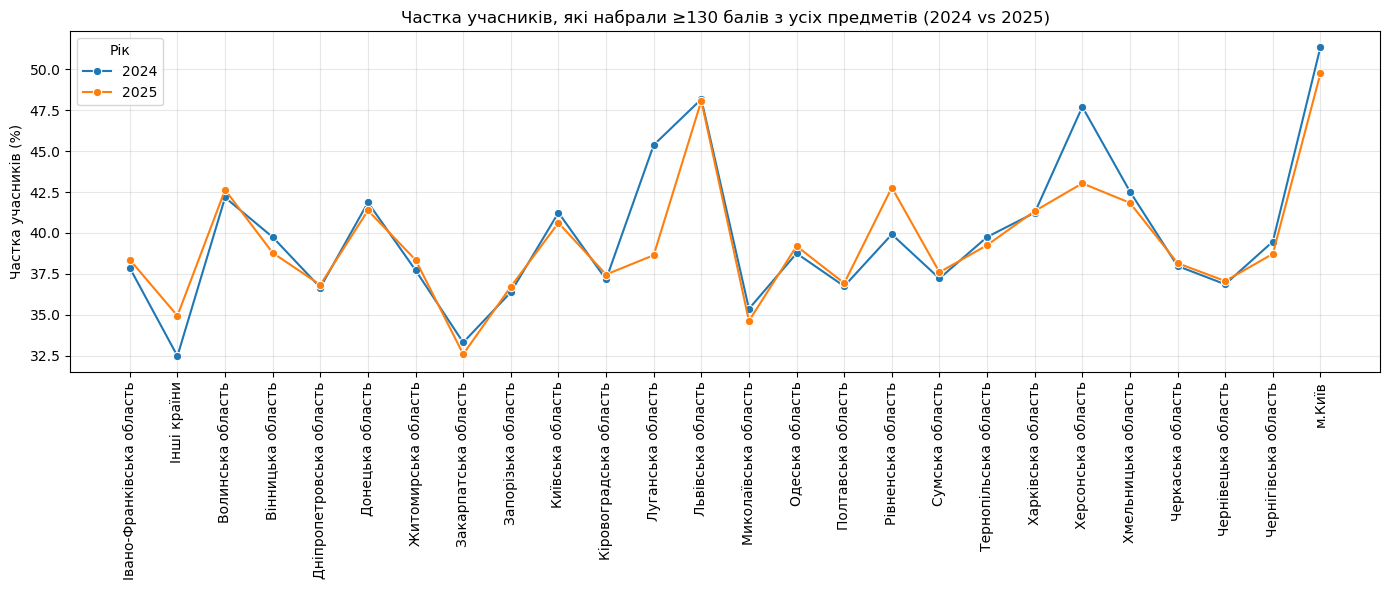

In [77]:
# Загальна кількість учасників у кожному регіоні та році
total_participants = (
    df_all
    .groupby(['RegName', 'year'], as_index=False)
    .agg(total=('id_num', 'nunique'))
)

# Фільтр: залишаємо лише тих, у кого є всі 4 оцінки
df_complete = df_all.dropna(subset=subjects_130)

# Фільтр: усі предмети ≥130
df_passed_all = df_complete[df_complete[subjects_130].ge(130).all(axis=1)]

# Кількість таких учасників у кожному регіоні та році
passed_count = (
    df_passed_all
    .groupby(['RegName', 'year'], as_index=False)
    .agg(passed_all_130=('id_num', 'nunique'))
)

# Об’єднуємо обидві таблиці
region_pass130 = total_participants.merge(passed_count, on=['RegName', 'year'], how='left')
region_pass130['passed_all_130'] = region_pass130['passed_all_130'].fillna(0)

# Обчислюємо частку (%)
region_pass130['Частка_>=130'] = (region_pass130['passed_all_130'] / region_pass130['total']) * 100

# 8️⃣ Сортуємо області
region_pass130 = region_pass130.sort_values('RegName')

# 9️⃣ Візуалізація
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=region_pass130,
    x='RegName',
    y='Частка_>=130',
    hue='year',
    palette=palette,
    marker='o'
)

plt.title('Частка учасників, які набрали ≥130 балів з усіх предметів (2024 vs 2025)', fontsize=12)
plt.xlabel('')
plt.ylabel('Частка учасників (%)')
plt.xticks(rotation=90)
plt.legend(title='Рік')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<p style='color:steelblue; font-weight: 700;'> Загалом тенденції між роками схожі: м.Київ та Львівська область стабільно лідирують з найвищою часткою учасників, які набрали ≥130 балів з усіх предметів. Це свідчить про сильну освітню підготовку в цих регіонах. У більшості регіонів спостерігається незначне зростання або стабільність у 2025 році порівняно з 2024, що може свідчити про поступове покращення якості освіти або адаптацію до нових форматів тестування. В гіршу сторону змінилась ситуація в Луганській та Херсонській областях в 2025 році порівняно з 2024, що може бути пов’язано з обмеженим доступом до якісної підготовки, демографічними факторами або наслідками воєнних дій. Рівненська область навпаки показала позивну зміну в 2025 році.
Найнижчі результати серед закладів України - у Закарпатській області, де частка успішних учасників знизилась до 32.5%.
Потенційні дії: визначити успішні регіони, які можуть слугувати прикладом для освітньої політики та дослідити їхні практики - можливо, вони можуть бути масштабовані.
</p>

#### Висновки з аналізу  
- В 2024 році 22.5% учасників не склали НМТ, в 2025 році цей показник покращився до 21%.
- Найскладній предмет - математика. Частка несклавших НМТ через математику в 2024 році - 11.6%, в 2025 - 10.9%.
- В 2025 році є статистично значуща різниця між середніми балами субтесту з математики чоловічої та жіночої статі.
- Лідерами серед найкращих результатів НМТ є заклади освіти, розташовані в Львівській області та м.Києві.
- Вибір четвертого предмета залежить від статі: жіноча стать віддає перевагу біології та українській літературі, чоловіча - географії та фізиці. Але найпріорітетнішим предметом є англійська мова для обох статей.
  
#### Рекомендації:
- Цільова підтримка регіонів з низькими показниками - через освітні програми, підготовчі курси, цифрові ресурси.
- Вивчення успішних практик лідерів - для масштабування на інші області.
- Моніторинг динаміки - регулярне оновлення аналітики для оцінки ефективності освітніх втручань.
